In [30]:
from sklearn.ensemble import RandomForestClassifier
import codecs  # this is used for file operations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import random as r
import multiprocessing
from multiprocessing import Process  # this is used for multithreading
from sklearn import preprocessing
from sklearn.manifold import TSNE
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import shutil
from sklearn.ensemble import RandomForestClassifier
import codecs  # this is used for file operations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


In [282]:
from sklearn.metrics import classification_report

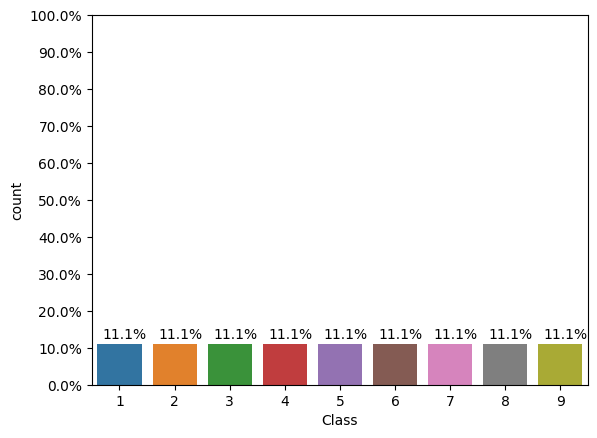

In [181]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

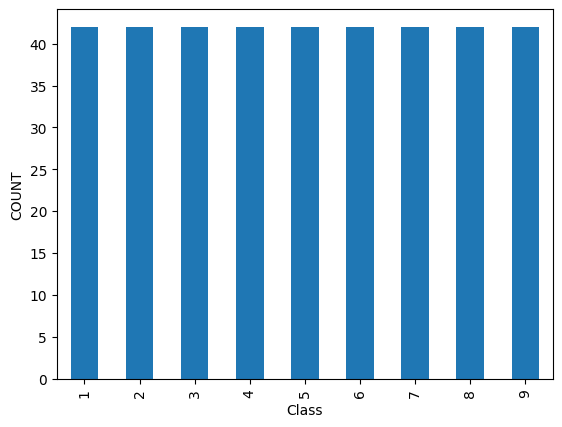

In [31]:
%matplotlib inline
df_train_labels = pd.read_csv("trainLabels.csv")
total_virus_cnt = len(df_train_labels)
ax = df_train_labels["Class"].sort_values().value_counts().plot(kind='bar')
ax.set_ylabel("COUNT")
ax.set_xlabel("Class")
plt.show()


In [53]:
# file sizes of byte files

files = os.listdir('./train/bytes')
filenames = df_train_labels['ID'].tolist()
class_y = df_train_labels['Class'].tolist()
class_bytes = []
sizebytes = []
fnames = []
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0,
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo = os.stat('./train/bytes/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file = file.split('.')[0]
    if file in filenames:
        i = filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte = pd.DataFrame(
    {'ID': fnames, 'size': sizebytes, 'Class': class_bytes})
print(data_size_byte.head(30))


                      ID       size  Class
0   5tQ4OCNKrDpPhWB7ngou   0.594727      4
1   cYb4XuNSqOA9IFLHseG1   1.982422      5
2   I8CpwJOgDijPzEKxQ6UW   0.495605      1
3   9MKSaiLY4AtGDZfvRQ1E   0.651367      4
4   friQmXP9g6D5AvOasLUT   0.906250      9
5   4MvTXueNz2rS08iER1BO  10.804199      3
6   5gl4sqLftFB2KVNvGrJZ   7.958008      2
7   hyOk7czQB9E56wtHZ3XP   6.485352      2
8   EMo7F2Xe8pgWKZfwhHuV   1.062012      9
9   2EgZDWKnJV3Gz4TkIiYU   8.099609      3
10  AlNimKRVGWnbq7X64jfs   0.835449      4
11  H6WRxDPro0tUmKV3pnOS   1.430176      6
12  KOsC9hgvbu7QEk085FZp   4.304688      7
13  dTPeEC5gShQ1YVcI94N0   0.438965      8
14  DtBPhFYTCJ8lcEp7Ojke   5.055176      7
15  4SyfKNtskEM1juUnXZv2   5.012695      9
16  fyH8oWql4rg7tEJSLpIB   1.840820      5
17  4c3h7j0QyqIgnKFzA5vR   4.304688      7
18  CSkITPbvqspWu68laVJn   0.594727      1
19  AeCXyFRcU2SsgvVTpMzi   1.146973      5
20  iBT1K8E62rpmG73jN9VS   0.637207      1
21  7OZ8auLijd26EwXcIGHo   0.552246      4
22  JlYNWgv

In [54]:
data_size_byte["Class"].unique()


array([4, 5, 1, 9, 3, 2, 6, 7, 8])

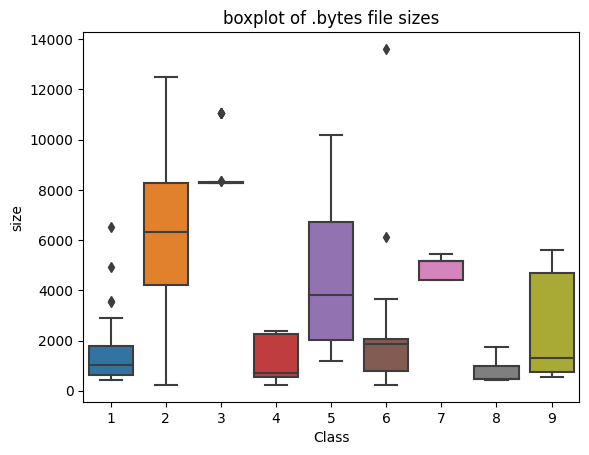

In [16]:
# boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_kbyte)
ax.set_ylabel("size")
ax.set_xlabel("Class")
plt.title("boxplot of .bytes file sizes")
plt.show()


In [6]:
# removal of addres from byte files
# contents of .byte files
# ----------------
# 00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08
# -------------------
# we remove the starting address 00401000

files = os.listdir('bytes')
filenames = []
array = []
for file in files:
    if (file.endswith("bytes")):
        file = file.split('.')[0]
        text_file = open('bytes/' + file + ".txt", 'w+')
        with open('bytes/' + file + ".bytes", "r") as fp:
            lines = ""
            for line in fp:
                a = line.rstrip().split(" ")[1:]
                b = ' '.join(a)
                b = b + "\n"
                text_file.write(b)
            fp.close()
            os.remove('bytes/' + file + ".bytes")
        text_file.close()


In [7]:
# Unigram feature extraction
# byte files are nothing but collection of hex codes, which range from 0-256 (including ??)
# This code extracts counts of each hex code occuring in the files as features

files = os.listdir('bytes')
filenames2 = []
feature_matrix = np.zeros((len(files), 257), dtype=int)
k = 0

byte_feature_file = open('result.csv', 'w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??," + "\n")
for file in files:
    filenames2.append(file[:-4])
    byte_feature_file.write(file + ",")
    if (file.endswith("txt")):
        with open('bytes/'+file, "r") as byte_flie:
            for lines in byte_flie:
                line = lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code == '??':
                        feature_matrix[k][256] += 1
                    else:
                        feature_matrix[k][int(hex_code, 16)] += 1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")

    k += 1

byte_feature_file.close()


In [46]:
# Printing unigram counts for all files
byte_features_unigram = pd.read_csv("result.csv")
print(byte_features_unigram.head())
print(byte_features_unigram.shape)


                     ID       0     1     2     3     4     5     6     7  \
0  ajpIxyzuMmAlJ9cw2HTY    6437    79    28    27    22    23     5     7   
1  0HKFs3AXTt1IrOl52eVu   25344   655   213   353   241   293   154   478   
2  7Y5Egr0XjO8UIvNFA16L   19821   743   315   442   608   361   221   233   
3  bnTwRQSvo3CLKsgGaI45  101117  1141   547   829   706   952   782   604   
4  cIojVJGQOtrL0S1ApeDY   11362  1894  1810  1354  1771  1399  1201  1084   

      8  ...    f8   f9   fa   fb    fc   fd   fe    ff       ??  Unnamed: 258  
0    22  ...     6    1    1    4    10    9   13   623  1234104           NaN  
1   209  ...   936  641  699  714  1116  517  413  3324     6972           NaN  
2   387  ...   985  340  201  259   682  223  217  2191     9008           NaN  
3   751  ...   540  450  412  405   378  426  490  1900     1492           NaN  
4  1792  ...  1049  819  805  843   828  820  883  2476   216780           NaN  

[5 rows x 259 columns]
(378, 259)


In [47]:
# removing the last column (unnamed: 258)
byte_features_unigram = byte_features_unigram.iloc[:, :-1]
print(byte_features_unigram.head())
print(byte_features_unigram.shape)


                     ID       0     1     2     3     4     5     6     7  \
0  ajpIxyzuMmAlJ9cw2HTY    6437    79    28    27    22    23     5     7   
1  0HKFs3AXTt1IrOl52eVu   25344   655   213   353   241   293   154   478   
2  7Y5Egr0XjO8UIvNFA16L   19821   743   315   442   608   361   221   233   
3  bnTwRQSvo3CLKsgGaI45  101117  1141   547   829   706   952   782   604   
4  cIojVJGQOtrL0S1ApeDY   11362  1894  1810  1354  1771  1399  1201  1084   

      8  ...   f7    f8   f9   fa   fb    fc   fd   fe    ff       ??  
0    22  ...    2     6    1    1    4    10    9   13   623  1234104  
1   209  ...  518   936  641  699  714  1116  517  413  3324     6972  
2   387  ...  817   985  340  201  259   682  223  217  2191     9008  
3   751  ...  479   540  450  412  405   378  426  490  1900     1492  
4  1792  ...  883  1049  819  805  843   828  820  883  2476   216780  

[5 rows x 258 columns]
(378, 258)


In [55]:
# Merge size and unigram features

byte_uni_size = pd.merge(byte_features_unigram,
                         data_size_byte, on='ID', how='left')
byte_uni_size.head()
byte_uni_size.head()


,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,ajpIxyzuMmAlJ9cw2HTY,6437,79,28,27,22,23,5,7,22,...,1,1,4,10,9,13,623,1234104,4.304688,7
1,0HKFs3AXTt1IrOl52eVu,25344,655,213,353,241,293,154,478,209,...,641,699,714,1116,517,413,3324,6972,0.424805,8
2,7Y5Egr0XjO8UIvNFA16L,19821,743,315,442,608,361,221,233,387,...,340,201,259,682,223,217,2191,9008,0.438965,8
3,bnTwRQSvo3CLKsgGaI45,101117,1141,547,829,706,952,782,604,751,...,450,412,405,378,426,490,1900,1492,0.877930,9
4,cIojVJGQOtrL0S1ApeDY,11362,1894,1810,1354,1771,1399,1201,1084,1792,...,819,805,843,828,820,883,2476,216780,1.670898,5


In [56]:
byte_uni_size.to_csv("final_features_bytes", index=False)


In [10]:
# normalize features using min max scalar
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name) != str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (
                df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [146]:
byte_uni_size.head()
byte_uni_size.to_csv("./featurization/uni_gram_byte_features__with_size.csv", index=False)

In [279]:
byte_uni_size = pd.read_csv("./featurization/uni_gram_byte_features__with_size.csv")
byte_uni_size_norm = normalize(byte_uni_size)
byte_uni_size_norm.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,ajpIxyzuMmAlJ9cw2HTY,0.008734,0.000269,0.000005,0.000067,0.000009,0.000092,0.000001,0.000151,0.000130,...,0.000158,0.000000,0.000007,0.000230,0.000267,0.000000,0.006913,0.323572,0.312026,7
1,0HKFs3AXTt1IrOl52eVu,0.035674,0.006727,0.000304,0.003731,0.000381,0.002856,0.000191,0.017988,0.003177,...,0.101280,0.005151,0.005073,0.051052,0.015329,0.020113,0.046472,0.001828,0.015168,8
2,7Y5Egr0XjO8UIvNFA16L,0.027804,0.007713,0.000469,0.004731,0.001006,0.003553,0.000277,0.008710,0.006077,...,0.053721,0.001476,0.001827,0.031109,0.006612,0.010257,0.029878,0.002362,0.016251,8
3,bnTwRQSvo3CLKsgGaI45,0.143639,0.012176,0.000845,0.009080,0.001173,0.009603,0.000992,0.022760,0.012008,...,0.071101,0.003033,0.002868,0.017140,0.012631,0.023984,0.025616,0.000391,0.049837,9
4,cIojVJGQOtrL0S1ApeDY,0.015752,0.020618,0.002888,0.014980,0.002985,0.014180,0.001526,0.040938,0.028969,...,0.129404,0.005933,0.005994,0.037818,0.024313,0.043745,0.034052,0.056838,0.110509,5


In [280]:
# Seperating label into variable
label = byte_uni_size_norm['Class']
# byte_uni_size_norm.head()


/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


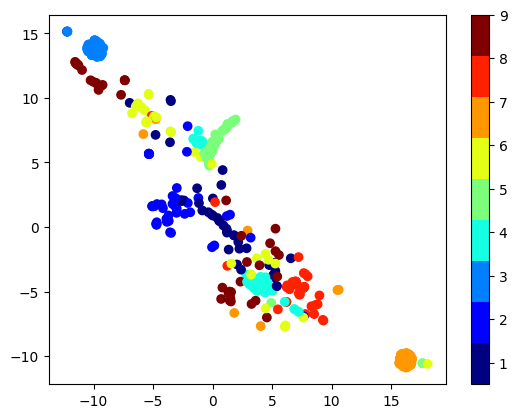

In [185]:
# multivariate analysis on byte files
# this is with perplexity 50
xtsne = TSNE(perplexity=50)
results = xtsne.fit_transform(byte_uni_size_norm.drop(['ID', 'Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=label, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()


/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


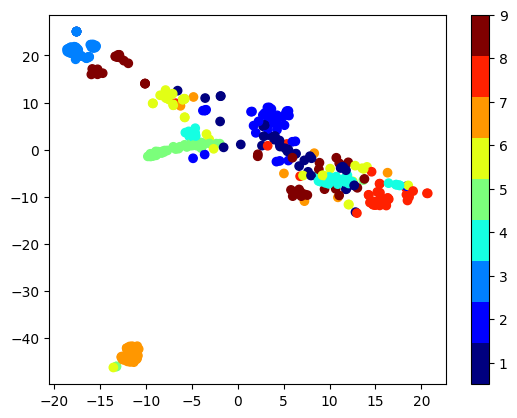

In [186]:
# this is with perplexity 30
xtsne = TSNE(perplexity=30)
results = xtsne.fit_transform(byte_uni_size_norm.drop(['ID', 'Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=label, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()


In [305]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(byte_uni_size_norm.drop(['ID', 'Class'], axis=1), label, stratify=label, test_size=0.20)
X_train, X_cv, y_train, y_cv=train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.20)



In [309]:
y_train-=1
y_cv-=1
y_test-=1

In [188]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])


Number of data points in train data: 241
Number of data points in test data: 76
Number of data points in cross validation data: 61


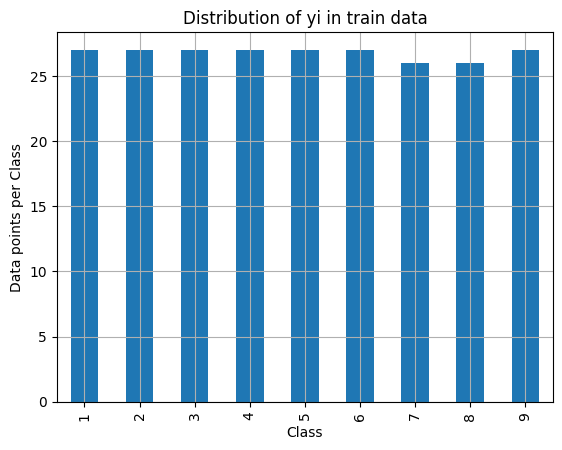

In [31]:
# Visualisation of class wise distribution of data points of test, train and validation sets
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()


train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


In [32]:
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', train_class_distribution.values[i], '(', np.round(
        (train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')
        (train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')


Number of data points in class 1 : 27 ( 11.203 %)
Number of data points in class 2 : 27 ( 11.203 %)
Number of data points in class 3 : 27 ( 11.203 %)
Number of data points in class 4 : 27 ( 11.203 %)
Number of data points in class 5 : 27 ( 11.203 %)
Number of data points in class 6 : 27 ( 11.203 %)
Number of data points in class 9 : 27 ( 11.203 %)
Number of data points in class 7 : 26 ( 10.788 %)
Number of data points in class 8 : 26 ( 10.788 %)


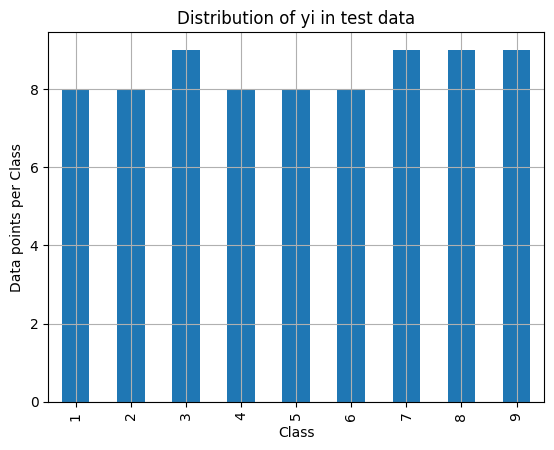

In [33]:
# Visulisation of test data
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()


In [34]:
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', test_class_distribution.values[i], '(', np.round(
        (test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')
        (test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')


Number of data points in class 3 : 9 ( 11.842 %)
Number of data points in class 7 : 9 ( 11.842 %)
Number of data points in class 8 : 9 ( 11.842 %)
Number of data points in class 9 : 9 ( 11.842 %)
Number of data points in class 1 : 8 ( 10.526 %)
Number of data points in class 2 : 8 ( 10.526 %)
Number of data points in class 4 : 8 ( 10.526 %)
Number of data points in class 5 : 8 ( 10.526 %)
Number of data points in class 6 : 8 ( 10.526 %)


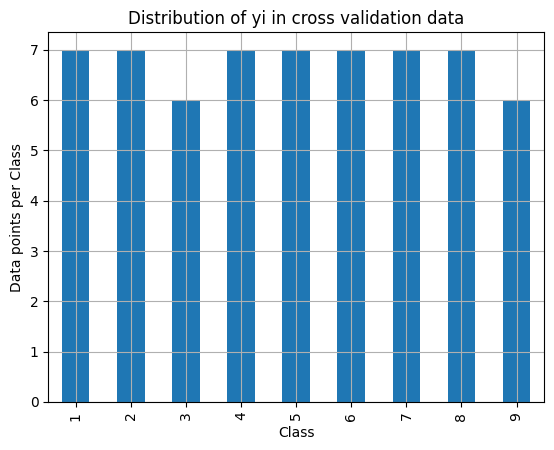

In [35]:
# Visulisation of Validation data
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()


In [36]:
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', cv_class_distribution.values[i], '(', np.round(
        (cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


Number of data points in class 1 : 7 ( 11.475 %)
Number of data points in class 2 : 7 ( 11.475 %)
Number of data points in class 3 : 6 ( 9.836 %)
Number of data points in class 4 : 7 ( 11.475 %)
Number of data points in class 5 : 7 ( 11.475 %)
Number of data points in class 6 : 7 ( 11.475 %)
Number of data points in class 9 : 6 ( 9.836 %)
Number of data points in class 7 : 7 ( 11.475 %)
Number of data points in class 8 : 7 ( 11.475 %)


In [31]:
# #  Confusion Matrix
# def plot_confusion_matrix(test_y, predict_y):
#       C = confusion_matrix(test_y, predict_y)
#       print("Percentage of misclassified points ", (len(test_y)-np.trace(C))/len(test_y)*100)
#       precision, recall, f1, _ = precision_recall_fscore_support(test_y, predict_y, average='weighted')

#       A = precision


#       B = recall
#       # divid each element of the confusion matrix with the sum of elements in that row

#       labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
#       cmap = sns.light_palette("green")
#       print("-"*50, "Confusion matrix", "-"*50)
#       plt.figure(figsize=(10, 5))
#       plt.figure(figsize=(10, 5))
#       sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f",
#                   xticklabels=labels, yticklabels=labels)
#       plt.xlabel('Predicted Class')
#       plt.ylabel('Original Class')
#       plt.show()

#       # print("-"*50, "Precision matrix", "-"*50)
#       # plt.figure(figsize=(10, 5))
#       # sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)

#       # plt.xlabel('Predicted Class')
#       # plt.ylabel('Original Class')
#       # print("Sum of columns in precision matrix", precision.sum(axis=0))


#       # print("-"*50, "Recall matrix", "-"*50)
#       # plt.figure(figsize=(10, 5))
#       # sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f",
#       #             xticklabels=labels, yticklabels=labels)
#       # sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f",
#       #             xticklabels=labels, yticklabels=labels)
#       # plt.xlabel('Predicted Class')

#       print(f"Weighted Precision : {precision}")
#       print(f"Weighted Recall : {recall}")


In [278]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # print("Accuracy : ",(len(test_y)-np.trace(C))/len(test_y)*100)
    print("Accuracy : ", (np.trace(C))/np.sum(C)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    # A -> recall
    A = (((C.T)/(C.sum(axis=1))).T)

    print(f"=========================********RECALL{A}********================================")
    # divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    # B -> Precision
    B = (C/C.sum(axis=0))
    print(f"=========================********RECALL{B}********================================")
    # divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]

    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    cmap = sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10, 5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10, 5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix", B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix", "-"*50)
    plt.figure(figsize=(10, 5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in recall matrix", A.sum(axis=1))


log_loss for k =  1 is 0.7141641083019347
log_loss for k =  3 is 0.7218438777750894
log_loss for k =  5 is 0.7267841140993316
log_loss for k =  7 is 0.7593262238082604
log_loss for k =  9 is 0.8029132232425387
log_loss for k =  11 is 0.8442942956530127
log_loss for k =  13 is 0.8771143129115944
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        26

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


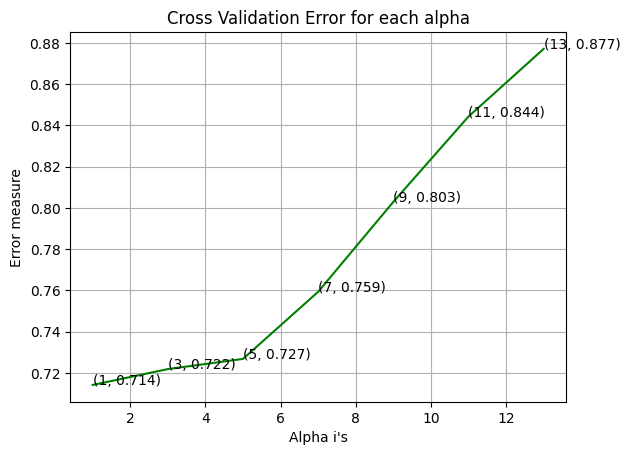

In [287]:
#  KNN

alpha = [x for x in range(1, 15, 2)]
cv_log_error_array = []
for i in alpha:
    k_cfl = KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(
        log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
for i in range(len(cv_log_error_array)):
    print('log_loss for k = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha=np.argmin(cv_log_error_array)
fig, ax = plt.subplots()

ax.plot(alpha, cv_log_error_array, c='g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)),
                (alpha[i], cv_log_error_array[i]))
 


plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
k_cfl = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

# predict_y = sig_clf.predict_proba(X_train)
# print('For values of best alpha = ',alpha[best_alpha], "The train log loss is:", log_loss(y_train, predict_y))
# predict_y = sig_clf.predict_proba(X_cv)
# print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", log_loss(y_cv, predict_y))  
# predict_y=sig_clf.predict_proba(X_test)    
# print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", log_loss(y_test, predict_y))


target = ['1','2','3','4','5','6','7','8','9']
predict_y = k_cfl.predict(X_train)

print(classification_report(y_train, predict_y, target_names=target))


In [288]:

predict_y = k_cfl.predict(X_cv)
print("---------------------val---------------------------")
print("---------------------val---------------------------")
print(classification_report(y_cv, predict_y, target_names=target))


---------------------val---------------------------
---------------------val---------------------------
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         7
           4       0.88      1.00      0.93         7
           5       0.78      1.00      0.88         7
           6       0.86      0.86      0.86         7
           7       1.00      0.83      0.91         6
           8       1.00      0.67      0.80         6
           9       1.00      0.71      0.83         7

    accuracy                           0.87        61
   macro avg       0.91      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61



In [289]:
predict_y = k_cfl.predict(X_test)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test, predict_y, target_names=target))





---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.73      1.00      0.84         8
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00         8
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00         9
           6       0.88      0.88      0.88         8
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         9
           9       1.00      0.78      0.88         9

    accuracy                           0.92        76
   macro avg       0.93      0.92      0.92        76
weighted avg       0.93      0.92      0.92        76



/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

log loss for train data 1.2303123282268233
log loss for cv data 1.3358754523884513
log loss for test data 1.2129262033239565
Accuracy :  72.36842105263158
=========================********RECALL[[0.5        0.         0.         0.125      0.         0.
  0.         0.375      0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.66666667 0.22222222 0.
  0.11111111 0.         0.        ]
 [0.         0.         0.         0.375      0.         0.375
  0.         0.25       0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.         0.         0.         

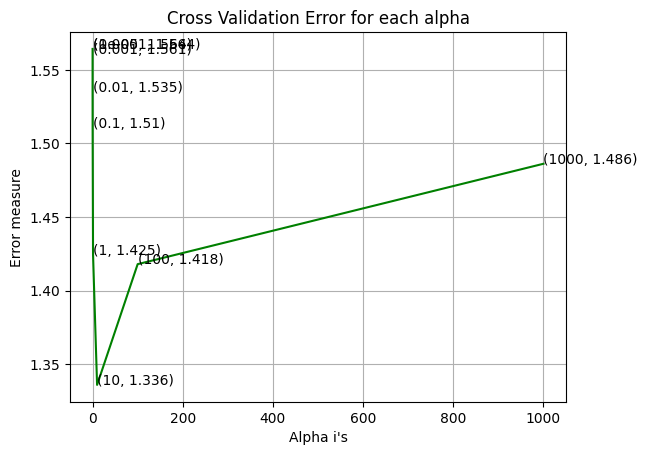

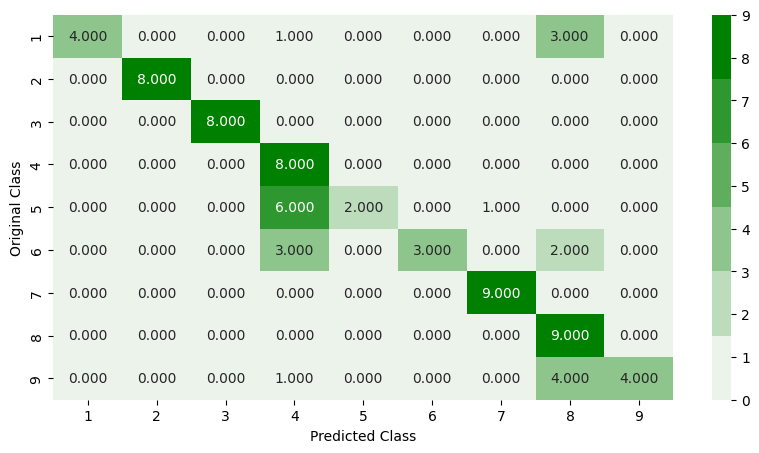

-------------------------------------------------- Precision matrix --------------------------------------------------


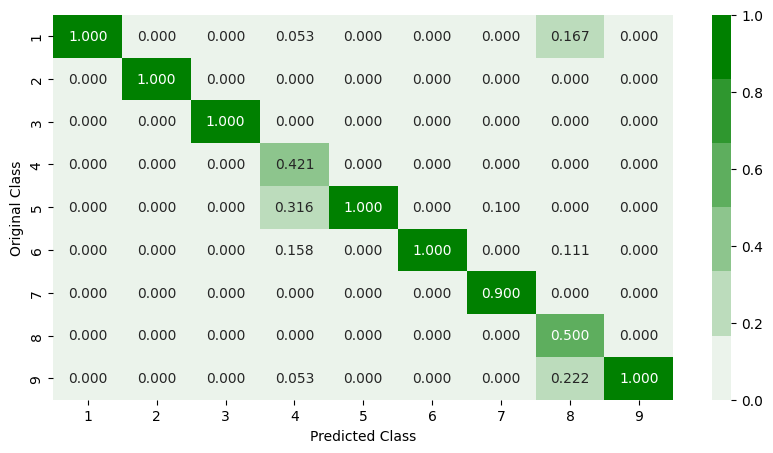

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


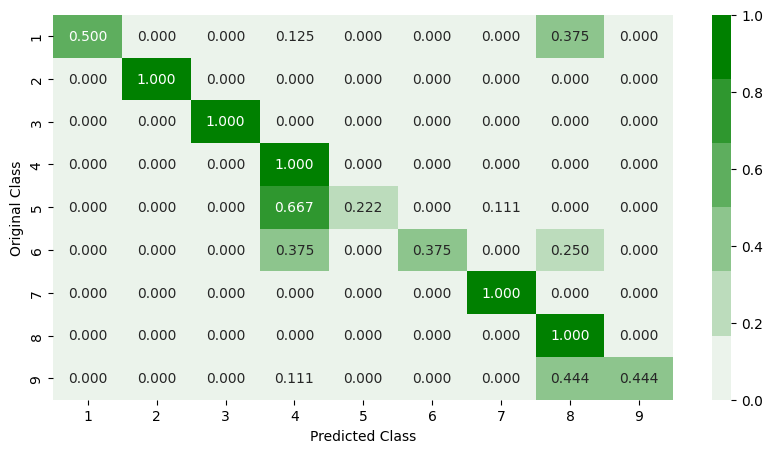

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [290]:
# Logistic Regression

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array = []
for i in alpha:
    logisticR = LogisticRegression(penalty='l2', C=i, class_weight='balanced')
    logisticR.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(
        log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))

    # print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])
    # print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])
best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)),
                (alpha[i], cv_log_error_array[i]))
  
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
logisticR = LogisticRegression(
    penalty='l2', C=alpha[best_alpha], class_weight='balanced')
logisticR.fit(X_train, y_train)


sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y = sig_clf.predict(X_test)
predict_y = sig_clf.predict_proba(X_train)
print('log loss for train data', log_loss(
    y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('log loss for cv data', log_loss(
    y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('log loss for test data', log_loss(
    y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))



In [291]:
predict_y = logisticR.predict(X_test)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test, predict_y, target_names=target))

---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       0.62      1.00      0.76         8
           5       1.00      0.67      0.80         9
           6       1.00      0.62      0.77         8
           7       0.90      1.00      0.95         9
           8       0.75      1.00      0.86         9
           9       1.00      0.89      0.94         9

    accuracy                           0.88        76
   macro avg       0.92      0.88      0.88        76
weighted avg       0.92      0.88      0.88        76



175408.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175408.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175409.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175409.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175409.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175409.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175410.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175410.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175410.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175410.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
175410.90s - pydevd: Sending m

For values of best alpha =  3000 The train log loss is: 0.28684369868825155
For values of best alpha =  3000 The cross validation log loss is: 0.5168776849992305
For values of best alpha =  3000 The test log loss is: 0.47292843769359666
Accuracy :  92.10526315789474
=========================********RECALL[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.875      0.         0.
  0.         0.125      0.        ]
 [0.         0.         0.         0.         0.88888889 0.11111111
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.875
  0.125      0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.       

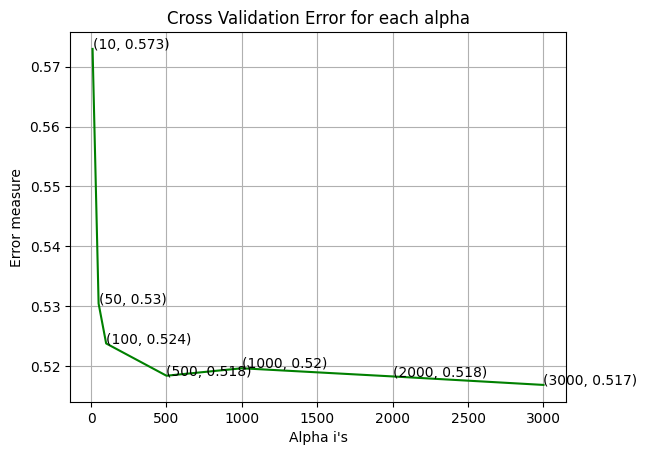

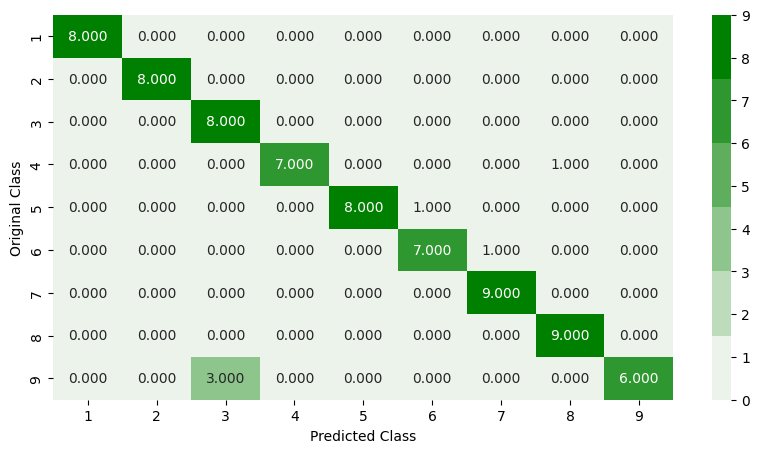

-------------------------------------------------- Precision matrix --------------------------------------------------


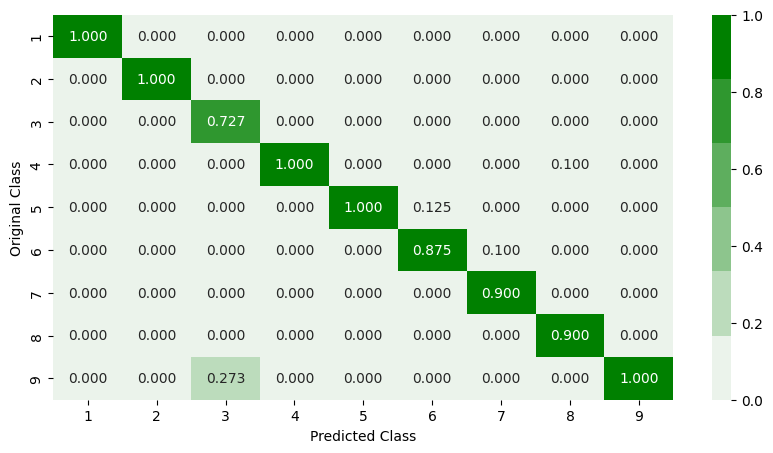

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


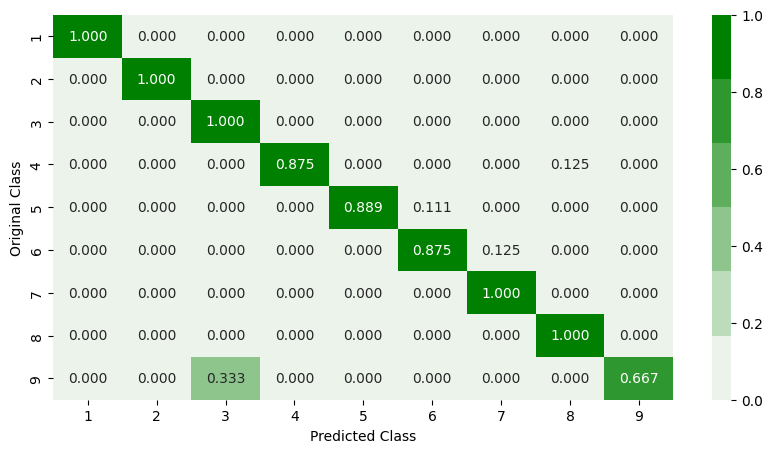

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [292]:
# Random Forest

train_log_error_array = []
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in alpha:
    r_cfl = RandomForestClassifier(n_estimators=i, random_state=42, n_jobs=-1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(
        log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))
    

        # print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])
        # print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha=np.argmin(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)),
                (alpha[i], cv_log_error_array[i]))
        
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

r_cfl=RandomForestClassifier(
n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train, y_train)
sig_clf=CalibratedClassifierCV(r_cfl, method = "sigmoid")
sig_clf.fit(X_train, y_train)
pred_y = sig_clf.predict(X_test)
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ',
alpha[best_alpha], "The train log loss is:", log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ',
        alpha[best_alpha], "The cross validation log loss is:", log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)        
print('For values of best alpha = ',
      alpha[best_alpha], "The test log loss is:", log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))


In [293]:
predict_y = r_cfl.predict(X_test)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test, predict_y, target_names=target))

---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       0.73      1.00      0.84         8
           4       1.00      0.88      0.93         8
           5       1.00      0.89      0.94         9
           6       0.78      0.88      0.82         8
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         9
           9       1.00      0.67      0.80         9

    accuracy                           0.92        76
   macro avg       0.93      0.92      0.92        76
weighted avg       0.94      0.92      0.92        76



log_loss for c =  10 is 0.6406682181811162
log_loss for c =  50 is 0.5754220888873113
log_loss for c =  100 is 0.5740653389144763
log_loss for c =  500 is 0.5706103127669718
log_loss for c =  1000 is 0.5706096809616886
log_loss for c =  2000 is 0.5706082301800358
For values of best alpha =  2000 The train log loss is: 0.2862226490547623
For values of best alpha =  2000 The cross validation log loss is: 0.5706082301800358
For values of best alpha =  2000 The test log loss is: 0.7322269342006231
Accuracy :  85.52631578947368
-------------------------------------------------- Confusion matrix --------------------------------------------------


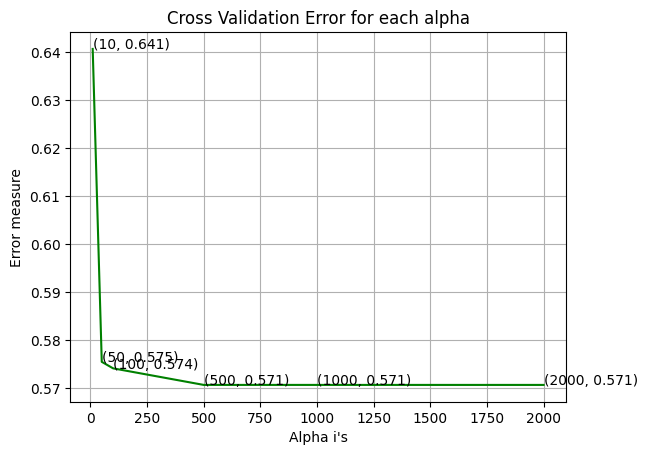

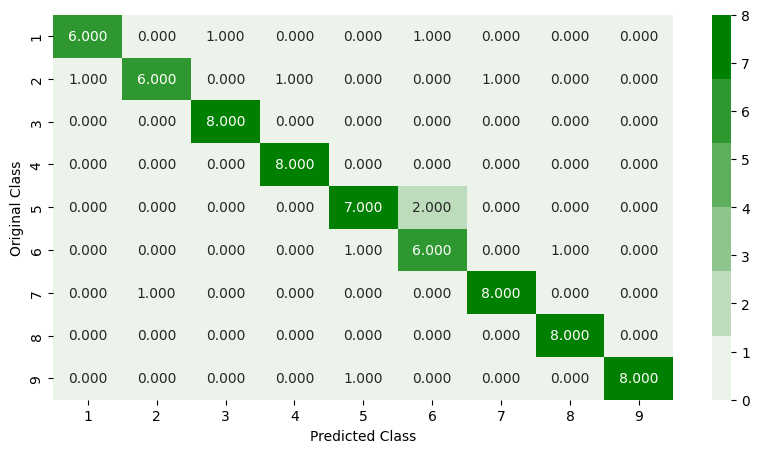

-------------------------------------------------- Precision matrix --------------------------------------------------


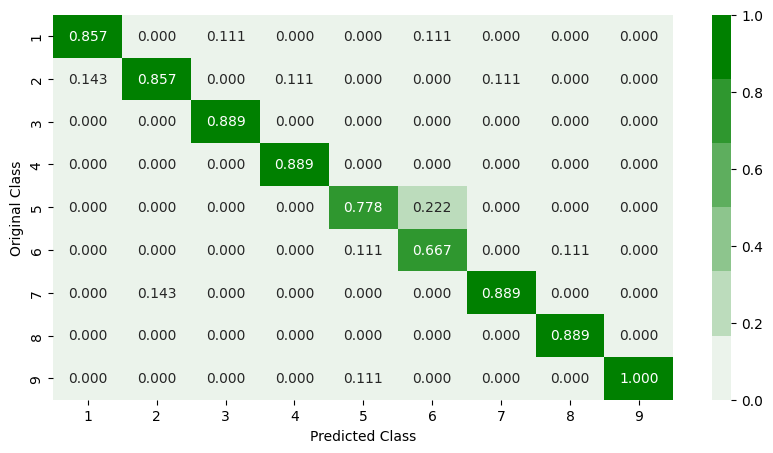

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


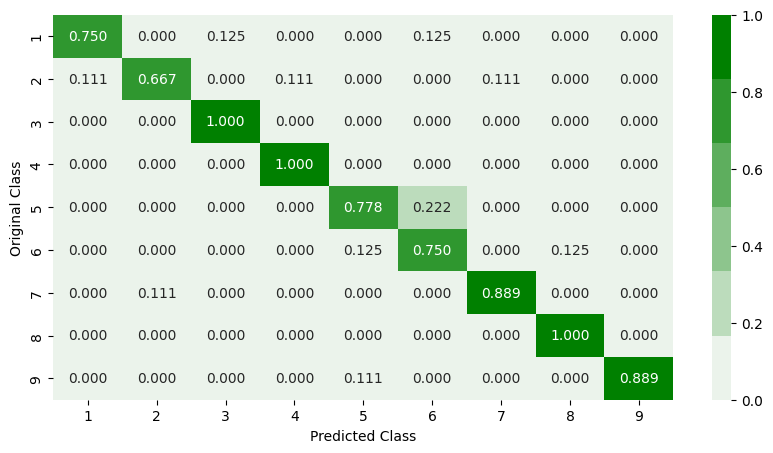

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [198]:
# XGBoost

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
y_train = y_train.subtract(1)
y_test = y_test.subtract(1)
y_cv = y_cv.subtract(1)
for i in alpha:
    x_cfl = XGBClassifier(n_estimators=i, nthread=-1)
    x_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(
        log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))
for i in range(len(cv_log_error_array)):
      print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])
#     print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha=np.argmin(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)),
                (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
x_cfl=XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")

sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ',
      alpha[best_alpha], "The train log loss is:", log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ',
      alpha[best_alpha], "The cross validation log loss is:", log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)      
print('For values of best alpha = ',
      alpha[best_alpha], "The test log loss is:", log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))
      

In [310]:
# y_train-=y_train.subtract(1)
# y_test-=y_test.subtract(1)
# y_cv-=y_cv.subtract(1)
print(y_train)


234    2
6      5
212    5
83     4
77     6
      ..
123    4
293    1
61     8
110    5
166    3
Name: Class, Length: 241, dtype: int64


In [311]:
#  XgBoost Classification with best hyper parameters using RandomSearch

# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl = XGBClassifier()

prams = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 200, 500, 1000, 2000],
    'max_depth': [3, 5, 10],
    'colsample_bytree': [0.1, 0.3, 0.5, 1],
    'subsample': [0.1, 0.3, 0.5, 1]
}
random_cfl1 = RandomizedSearchCV(
    x_cfl, param_distributions=prams, verbose=10, n_jobs=-1,)
random_cfl1.fit(X_train, y_train)
print(random_cfl1.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


177103.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177103.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177104.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177104.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177104.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177104.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177105.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177105.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177105.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177105.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177105.90s - pydevd: Sending m

[CV 2/5; 1/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.5
[CV 1/5; 1/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.5
[CV 3/5; 1/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.5
[CV 4/5; 1/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.5
[CV 5/5; 1/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.5
[CV 1/5; 2/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1
[CV 2/5; 2/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1
[CV 3/5; 2/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1
[CV 4/5; 2/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1
[CV 5/5; 2/10] START colsample_bytree=1

train loss 0.2523379443830326
cv loss 0.38129503850983093
test loss 0.5593182632152393
Accuracy :  88.1578947368421
=========================********RECALL[[0.88888889 0.         0.         0.         0.         0.11111111
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.875      0.         0.
  0.         0.125      0.        ]
 [0.         0.         0.         0.         0.875      0.
  0.         0.125      0.        ]
 [0.         0.125      0.         0.         0.         0.75
  0.         0.125      0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.22222222 0.         0.         0.         0.         0.11111111
  0.         0.66666667 0.        ]
 [0.125      0.         0.         0.         0.         0.

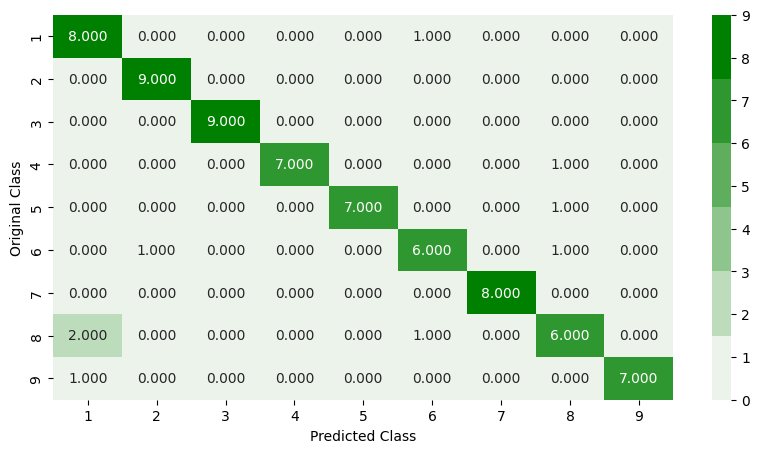

-------------------------------------------------- Precision matrix --------------------------------------------------


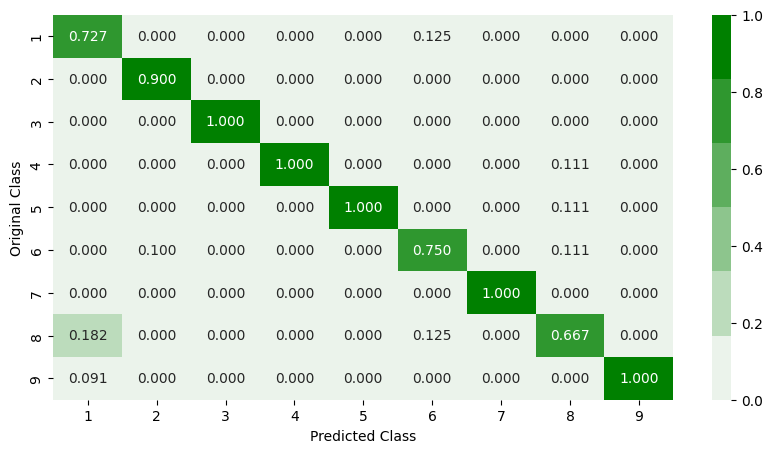

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


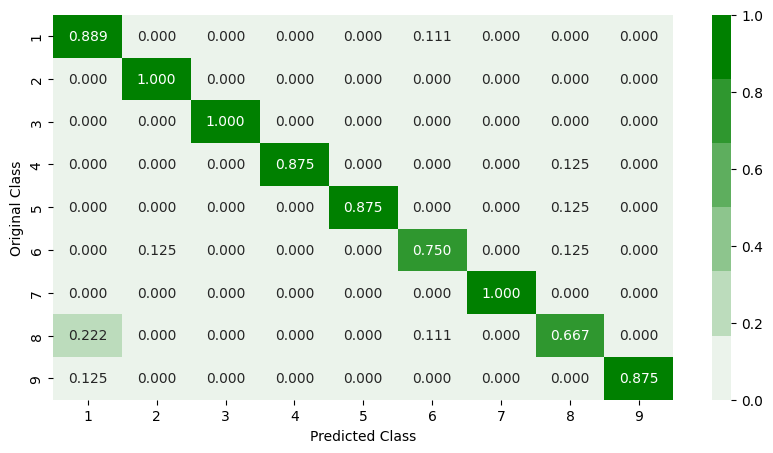

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [312]:
x_cfl = XGBClassifier(n_estimators=1000, learning_rate=0.05,
                      colsample_bytree=0.1, max_depth=10)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method='sigmoid')
c_cfl.fit(X_train, y_train)


predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

In [314]:
predict_y = x_cfl.predict(X_test)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test, predict_y, target_names=target))

---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         9
           4       1.00      0.88      0.93         8
           5       1.00      0.88      0.93         8
           6       0.75      0.75      0.75         8
           7       1.00      1.00      1.00         8
           8       0.67      0.67      0.67         9
           9       1.00      0.88      0.93         8

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.90        76
weighted avg       0.90      0.89      0.90        76



<h2> Modeling with .asm files </h2>

In [67]:
# intially create five folders
# first
# second
# third
# fourth
# fifth
# this code tells us about random split of files into five folders
f = 10
folder_1 = 'first'
folder_2 = 'second'
folder_3 = 'third'
folder_4 = 'fourth'
folder_5 = 'fifth'
folder_6 = 'output'
for i in [folder_1, folder_2, folder_3, folder_4, folder_5, folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source = 'train/asms/'
files = os.listdir(source)
ID = df_train_labels['Id'].tolist()
max_range = len(ID)
data = list(range(0, max_range))
r.shuffle(data)
count = 0
for i in range(0, max_range):
    if i % 5 == 0:
        shutil.copy(source+files[i], f'first/{files[data[i]]}')
    elif i % 5 == 1:
        shutil.copy(source+files[i], f'second/{files[data[i]]}')
    elif i % 5 == 2:
        shutil.copy(source+files[i], f'third/{files[data[i]]}')
    elif i % 5 == 3:
        shutil.copy(source+files[i], f'fourth/{files[data[i]]}')
    elif i % 5 == 4:
        shutil.copy(source+files[i], f'fifth/{files[data[i]]}')


In [70]:
# http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    # The prefixes tells about the segments that are present in the asm files
    # There are 450 segments(approx) present in all asm files.
    # this prefixes are best segments that gives us best values.
    # https://en.wikipedia.org/wiki/Data_segment

    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
                '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    # this are opcodes that are used to get best results
    # https://en.wikipedia.org/wiki/X86_instruction_listings

    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
               'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
    # best keywords that are taken from different blogs
    keywords = ['.dll', 'std::', ':dword']
    # Below taken registers are general purpose registers and special registers
    # All the registers which are taken are best
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open("output/asmsmallfile.txt", "w+")
    files = os.listdir('first')
    for f in files:
        # filling the values with zeros into the arrays
        prefixescount = np.zeros(len(prefixes), dtype=int)
        opcodescount = np.zeros(len(opcodes), dtype=int)
        keywordcount = np.zeros(len(keywords), dtype=int)
        registerscount = np.zeros(len(registers), dtype=int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2+",")
        # opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f, encoding='cp1252', errors='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line = lines.rstrip().split()
                l = line[0]
                # counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                # counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                # counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                # counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        # pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


# same as above
def secondprocess():
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
                '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
               'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
    keywords = ['.dll', 'std::', ':dword']
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open("output/mediumasmfile.txt", "w+")
    files = os.listdir('second')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype=int)
        opcodescount = np.zeros(len(opcodes), dtype=int)
        keywordcount = np.zeros(len(keywords), dtype=int)
        registerscount = np.zeros(len(registers), dtype=int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2+",")
        # opcodefile.write(f2+" ")
        with codecs.open('second/'+f, encoding='cp1252', errors='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions


def thirdprocess():
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
                '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
               'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
    keywords = ['.dll', 'std::', ':dword']
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open("output/largeasmfile.txt", "w+")
    files = os.listdir('third')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype=int)
        opcodescount = np.zeros(len(opcodes), dtype=int)
        keywordcount = np.zeros(len(keywords), dtype=int)
        registerscount = np.zeros(len(registers), dtype=int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2+",")
        # opcodefile.write(f2+" ")
        with codecs.open('third/'+f, encoding='cp1252', errors='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
                '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
               'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
    keywords = ['.dll', 'std::', ':dword']
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open("output/hugeasmfile.txt", "w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype=int)
        opcodescount = np.zeros(len(opcodes), dtype=int)
        keywordcount = np.zeros(len(keywords), dtype=int)
        registerscount = np.zeros(len(registers), dtype=int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2+",")
        # opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f, encoding='cp1252', errors='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
                '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
               'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
    keywords = ['.dll', 'std::', ':dword']
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open("output/trainasmfile.txt", "w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype=int)
        opcodescount = np.zeros(len(opcodes), dtype=int)
        keywordcount = np.zeros(len(keywords), dtype=int)
        registerscount = np.zeros(len(registers), dtype=int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2+",")
        # opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f, encoding='cp1252', errors='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    # the below code is used for multiprogramming
    # the number of process depends upon the number of cores present System
    # process is used to call multiprogramming
    manager = multiprocessing.Manager()
    p1 = Process(target=firstprocess)
    p2 = Process(target=secondprocess)
    p3 = Process(target=thirdprocess)
    p4 = Process(target=fourthprocess)
    p5 = Process(target=fifthprocess)
    # p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    # After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()


if __name__ == "__main__":
    main()


In [3]:
# Merge all the feature headings to form the column for asm features file

ids = ["ID"]
prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
            '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add',
           'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx']
keywords = ['.dll', 'std::', ':dword']
registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
keywords = ['.dll', 'std::', ':dword']
registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']


AsmFeatureColumns = ids + prefixes + opcodes + keywords + registers


# Concatenate the 5 dfs vertically to form the asm features dataframe

df1 = pd.read_csv("./output/asmsmallfile.csv", header=None)
df2 = pd.read_csv("./output/hugeasmfile.csv", header=None)
df3 = pd.read_csv("./output/largeasmfile.csv", header=None)
df4 = pd.read_csv("./output/mediumasmfile.csv", header=None)
df5 = pd.read_csv("./output/trainasmfile.csv", header=None)
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

# Create asm feature file asmoutputfile.csv
df = df.iloc[:, :-1]
df.columns = AsmFeatureColumns
df.to_csv("asmoutputfile.csv", index=False)


In [ ]:
# Create trainLabels.csv for reduced data

df = pd.read_csv("./Data/trainLabels.csv")
IDs = [x[:-4] for x in os.listdir("./train/asms")]
Classes = []

for id in IDs:
    for row in range(len(df)):
        if id == df.loc[row, "Id"]:
            Classes.append(df.loc[row, "Class"])

train_labels_dict = {"ID": IDs, "Class": Classes}
df_train_labels = pd.DataFrame(data=train_labels_dict)
df_train_labels.head()
len(df_train_labels)
df_train_labels.to_csv("trainLabels.csv", index=False)


In [5]:
#  Add class column to asmoutputfile

df_train_labels = pd.read_csv("./trainLabels.csv")
dfasm = pd.read_csv("asmoutputfile.csv")
df_asm_feat = pd.merge(dfasm, df_train_labels, on='ID', how='left')
df_asm_feat.shape
df_asm_feat.head()


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,DpNvYX1qedHLiQnRhF98,17,1446,0,0,1041,0,1459,0,3,...,24,252,122,81,1,0,4,0,0,7
1,27wyEMFY6QlxGfzpZ3iq,18,19360,0,1083,153490,0,1674,0,0,...,880,2148,1229,684,882,0,15,12,417,1
2,0giIqhw6e4mrHYzKFl8T,0,5243,0,282,3685,0,2240461,0,0,...,212,745,297,335,243,0,10,22,66,8
3,asKPnzUXjShMc0Tl6Wge,0,6295,0,292,3771,0,1546615,0,0,...,294,1071,392,501,291,0,10,22,69,5
4,gyOPeu8vNMszC1dH9cTm,0,26940,0,55,11669,0,57644,0,0,...,241,1023,263,244,142,0,3,0,11,3


In [7]:
# file sizes of byte files

files = os.listdir('./train/asms')
filenames = df_train_labels['ID'].tolist()
class_y = df_train_labels['Class'].tolist()
class_bytes = []
sizebytes = []
fnames = []
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0,
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo = os.stat('./train/asms/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file = file.split('.')[0]
    if file in filenames:
        i = filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte = pd.DataFrame(
    {'ID': fnames, 'size': sizebytes, 'Class': class_bytes})
print(asm_size_byte.head(30))


                      ID        size  Class
0   atsrDAlNJZBh63Ckbpx9    3.877651      6
1   HEsbjuQ2Zoln3XL5WGvN    0.158247      3
2   d2xiVKZe4JTgBQSkOntW   11.109746      4
3   F6WTdXrgLfco1s2PUlyH    7.627184      1
4   6Jdm89ABgOzRfitPVQ3M    1.040858      8
5   DpNvYX1qedHLiQnRhF98    0.137925      7
6   FhotrfvWBaGEu1sN2zSJ    0.169771      7
7   27wyEMFY6QlxGfzpZ3iq    1.137122      1
8   9ftj5a4V8hCr3pTAUiGl    0.169394      7
9   8zQ4ul6gyLe9xjTZqwEs    0.913438      8
10  0KZFcsOYR4MdPJf6VvGS    1.004021      6
11  8FOKNb1VGi0hYnc2u4ls    1.030827      6
12  LdYVqZXi4EpATxvmBcW8   11.111256      4
13  CMlwq0OXr8ygBbNESAIs    0.920508      8
14  4UTMdcZkxzLvwygO8EuK   10.147339      5
15  FOgyq9S0TIH6hzViMN1B    6.149692      1
16  0giIqhw6e4mrHYzKFl8T    0.929253      8
17  D4NQLor5zyHsjYCukl0O   33.177099      9
18  ijsaQxUhdyZ0ReqYklbG   21.739676      6
19  asKPnzUXjShMc0Tl6Wge    9.130557      5
20  aRi6UqPbCVQs1gLWmF4e    0.108560      1
21  e1oUMvCJ5rNWFnLdPglK    0.19

In [84]:
from collections import Counter
Counter(asm_size_byte["Class"]).values()


dict_values([42, 42, 42, 42, 42, 42, 42, 42, 42])

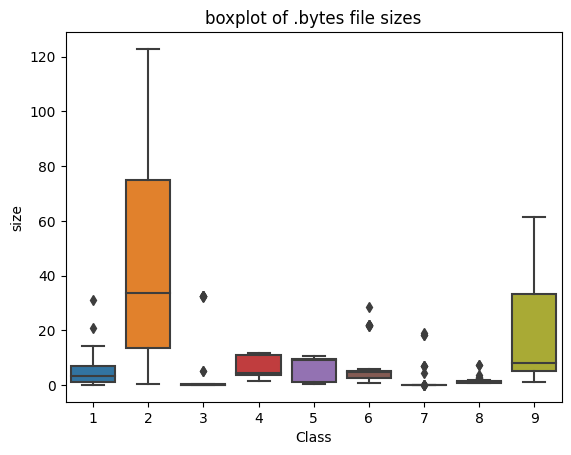

In [182]:
# boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()


In [143]:
print(df_asm_feat.shape)
print(asm_size_byte.shape)
result_asm_not_normalize = pd.merge(df_asm_feat, asm_size_byte.drop(
    ['Class'], axis=1), on='ID', how='left')
result_asm_not_normalize.head()

(378, 53)
(378, 3)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,DpNvYX1qedHLiQnRhF98,17,1446,0,0,1041,0,1459,0,3,...,252,122,81,1,0,4,0,0,7,0.137925
1,27wyEMFY6QlxGfzpZ3iq,18,19360,0,1083,153490,0,1674,0,0,...,2148,1229,684,882,0,15,12,417,1,1.137122
2,0giIqhw6e4mrHYzKFl8T,0,5243,0,282,3685,0,2240461,0,0,...,745,297,335,243,0,10,22,66,8,0.929253
3,asKPnzUXjShMc0Tl6Wge,0,6295,0,292,3771,0,1546615,0,0,...,1071,392,501,291,0,10,22,69,5,9.130557
4,gyOPeu8vNMszC1dH9cTm,0,26940,0,55,11669,0,57644,0,0,...,1023,263,244,142,0,3,0,11,3,0.158319


In [147]:
# add the file size feature to previous extracted features
print(df_asm_feat.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(df_asm_feat, asm_size_byte.drop(
    ['Class'], axis=1), on='ID', how='left')
result_asm.head()
result_asm_not_normalize.to_csv("./featurization/uni_gram_asm_features__with_size.csv", index=False)

(378, 53)
(378, 3)


In [323]:
# we normalize the data each column
result_asm = pd.read_csv("./featurization/uni_gram_asm_features__with_size.csv")
result_asm = normalize(result_asm)
result_asm.head()


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,DpNvYX1qedHLiQnRhF98,0.85,0.003480,0.0,0.000000,0.000414,0.0,0.000421,0.0,0.000239,...,0.004298,0.004392,0.002683,0.000024,0.0,0.037037,0.000000,0.000000,7,0.000701
1,27wyEMFY6QlxGfzpZ3iq,0.90,0.046587,0.0,0.081687,0.061074,0.0,0.000483,0.0,0.000000,...,0.036634,0.044247,0.022653,0.021043,0.0,0.138889,0.009210,0.171534,1,0.008840
2,0giIqhw6e4mrHYzKFl8T,0.00,0.012617,0.0,0.021270,0.001466,0.0,0.647104,0.0,0.000000,...,0.012706,0.010693,0.011095,0.005797,0.0,0.092593,0.016884,0.027149,8,0.007146
3,asKPnzUXjShMc0Tl6Wge,0.00,0.015148,0.0,0.022024,0.001500,0.0,0.446703,0.0,0.000000,...,0.018266,0.014113,0.016592,0.006943,0.0,0.092593,0.016884,0.028383,5,0.073949
4,gyOPeu8vNMszC1dH9cTm,0.00,0.064827,0.0,0.004148,0.004643,0.0,0.016649,0.0,0.000000,...,0.017447,0.009469,0.008081,0.003388,0.0,0.027778,0.000000,0.004525,3,0.000867


<h3> 4.2.2 Univariate analysis on  asm file features</h3>

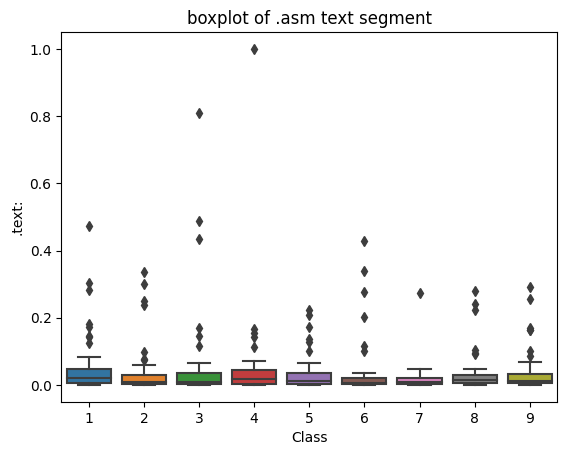

In [203]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()


<pre>
The plot is between Text and class 
Classes 1,2,3,4,5 have higher counts of the feature .text than the rest
</pre>

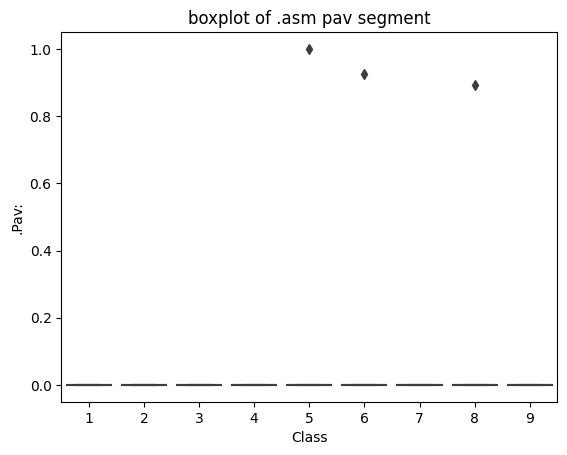

In [204]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()


Very few examples have this feature

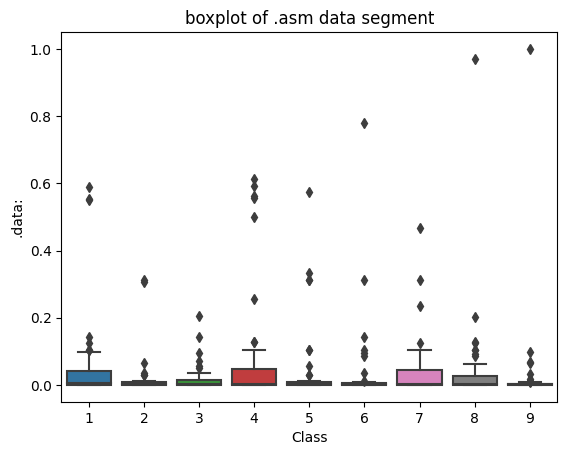

In [205]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()


<pre>
The plot is between data segment and class label 
class 1, 4. 7 and 8 can be separated from given points
</pre>

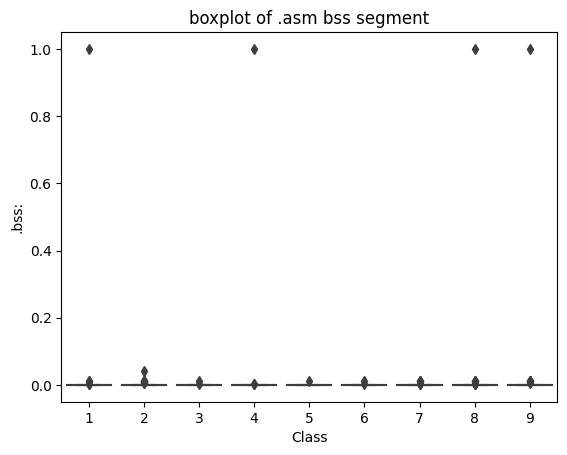

In [206]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()


<pre>
plot between bss segment and class label
very less number of files have bss segment
</pre>

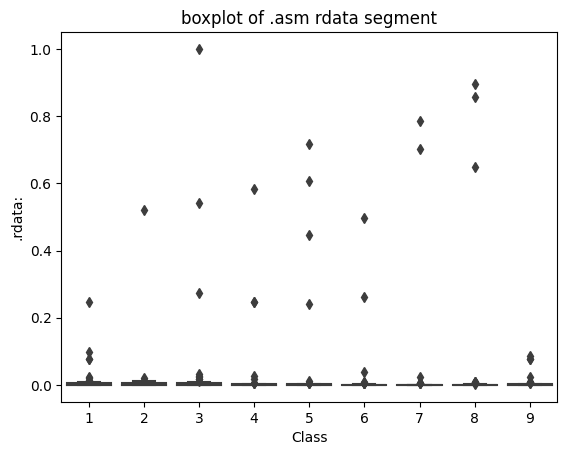

In [207]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()


<pre>
Plot between rdata segment and Class segment
Again, this feature is rare
</pre>

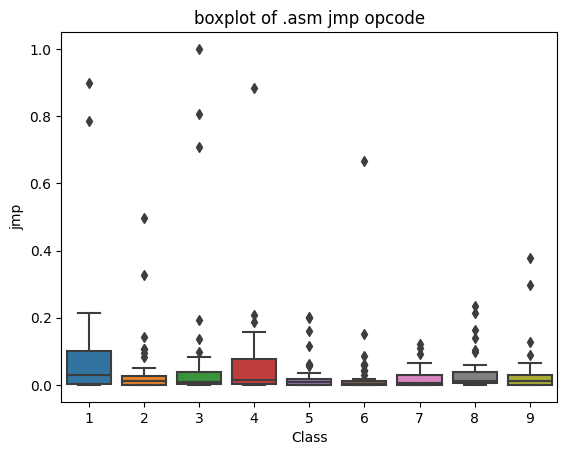

In [208]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()


<pre>
plot between jmp and Class label
Class 1 and 4 have high frequency for the feature jmp, while 5 and 6 have very low values
</pre>

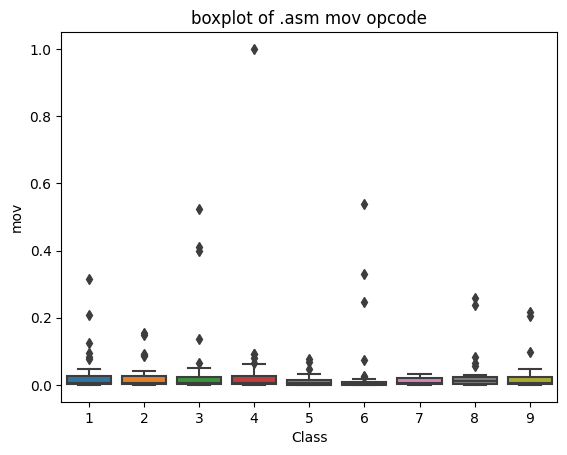

In [209]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()


<pre>
plot between Class label and mov opcode
Class 5 and 6 have low values for this feature
</pre>

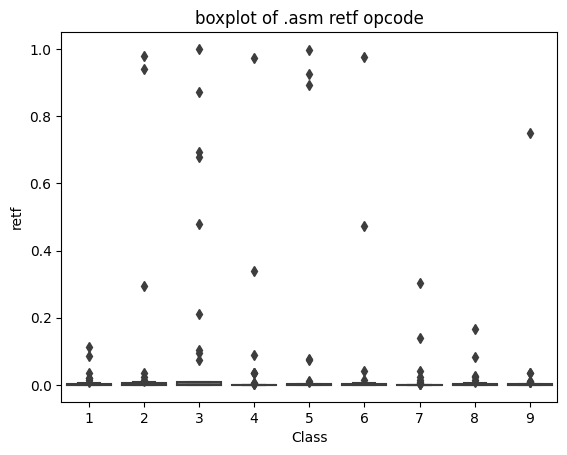

In [97]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()


<pre>
plot between Class label and retf
This feature is rare
</pre>

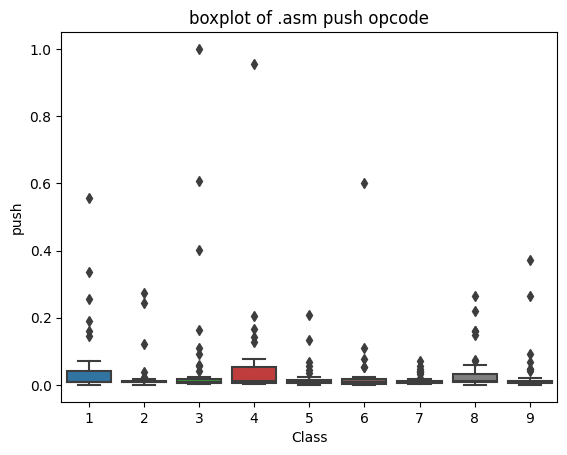

In [210]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()


In [316]:
# ax = sns.boxplot(x="Class", y=".Code:", data=result_asm)
# plt.title("boxplot of .asm .Code: opcode")
# plt.show()
result_asm.isna().sum()

ID           0
HEADER:      0
.text:       0
.Pav:        0
.idata:      0
.data:       0
.bss:        0
.rdata:      0
.edata:      0
.rsrc:       0
.tls:        0
.reloc:      0
.BSS:      378
.CODE      378
jmp          0
mov          0
retf         0
push         0
pop          0
xor          0
retn         0
nop          0
sub          0
inc          0
dec          0
add          0
imul         0
xchg         0
or           0
shr          0
cmp          0
call         0
shl          0
ror          0
rol          0
jnb          0
jz           0
rtn        378
lea          0
movzx        0
.dll         0
std::        0
:dword       0
edx          0
esi          0
eax          0
ebx          0
ecx          0
edi          0
ebp          0
esp          0
eip          0
Class        0
size         0
dtype: int64

<pre>
plot between push opcode and Class label
Class 1, 4 and 8 have higher values for this feature
</pre>

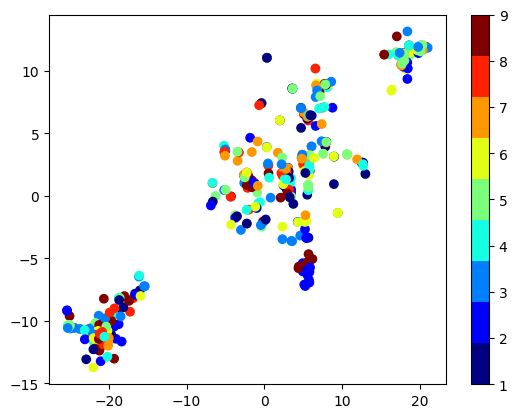

In [102]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

# multivariate analysis on byte files
# this is with perplexity 50
xtsne = TSNE(perplexity=50)
results = xtsne.fit_transform(
    result_asm.drop(['ID', 'Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_asm['Class'],
            cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.show()
plt.show()


/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


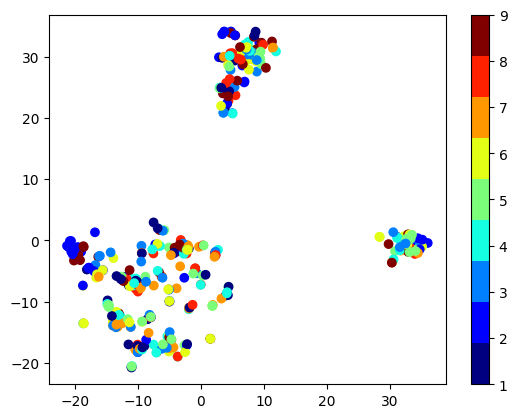

In [218]:
# by univariate analysis on the .asm file features we are getting very negligible information from
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne = TSNE(perplexity=30)
results = xtsne.fit_transform(result_asm.drop(
    ['ID', 'Class', 'retf', '.bss:', '.Pav:', '.rdata:', '.CODE', '.BSS:', 'rtn'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_asm['Class'],
            cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.show()


<pre>
TSNE for asm data with perplexity 50
</pre>

<!-- Conclusion -->
<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways: Each feature has its unique importance in separating the Class labels.
</li>
</p>

In [324]:
print(result_asm.shape)
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID', 'Class', 'retf', '.bss:',
                        '.Pav:', '.rdata:', '.CODE', '.BSS:', 'rtn'], axis=1)
asm_x.shape


(378, 54)


(378, 45)

In [325]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(
    asm_x, asm_y, stratify=asm_y, test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(
    X_train_asm, y_train_asm, stratify=y_train_asm, test_size=0.20)


In [221]:
_ = dict(X_cv_asm.isnull().all())
cnt = 0
for k, v in _.items():
    if v == True:
        print(k)
        cnt += 1
if cnt == 0:
    print("No NUll values in any feature")


No NUll values in any feature


In [222]:
X_train_asm.shape
# y_train_asm.shape


(241, 45)

<h2>. Machine Learning models on features of .asm files</h2>

In [224]:
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_asm, y_train_asm)
y_pred = neigh.predict(X_cv_asm)
cm = confusion_matrix(y_cv_asm, y_pred)

print("Accuracy : ", accuracy_score(y_cv_asm, y_pred))
print(cm)


Accuracy :  0.22950819672131148
[[3 0 2 1 0 1 0 0 0]
 [2 5 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 0 0 0]
 [2 0 1 1 2 0 0 0 0]
 [1 2 0 0 1 1 0 0 1]
 [1 0 4 1 0 1 0 0 0]
 [0 1 3 1 1 1 0 0 0]
 [1 0 1 1 0 2 1 1 0]
 [2 2 1 0 0 0 0 1 1]]


log_loss for k =  1 is 2.1383570911505836
log_loss for k =  3 is 2.1370118108792147
log_loss for k =  5 is 2.140316272579894
log_loss for k =  7 is 2.142265432360922
log_loss for k =  9 is 2.1398516995143475
log_loss for k =  11 is 2.158306622877031
log_loss for k =  13 is 2.1713355752006356


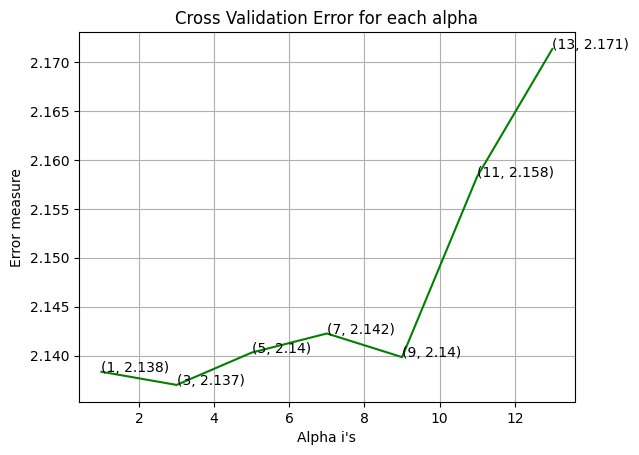

For values of best alpha =  3 The train log loss is: 1.9844775939525896
For values of best alpha =  3 The cross validation log loss is: 2.1370118108792147
For values of best alpha =  3 The test log loss is: 2.1299399729961683
Accuracy :  19.736842105263158
=========================********RECALL[[0.125      0.125      0.         0.         0.375      0.25
  0.         0.         0.125     ]
 [0.         0.55555556 0.         0.         0.         0.11111111
  0.         0.         0.33333333]
 [0.22222222 0.22222222 0.22222222 0.         0.         0.
  0.         0.         0.33333333]
 [0.125      0.         0.125      0.         0.         0.125
  0.125      0.125      0.375     ]
 [0.         0.         0.33333333 0.         0.11111111 0.22222222
  0.         0.         0.33333333]
 [0.         0.25       0.125      0.125      0.125      0.
  0.375      0.         0.        ]
 [0.         0.         0.25       0.         0.25       0.
  0.25       0.25       0.        ]
 [0.125    

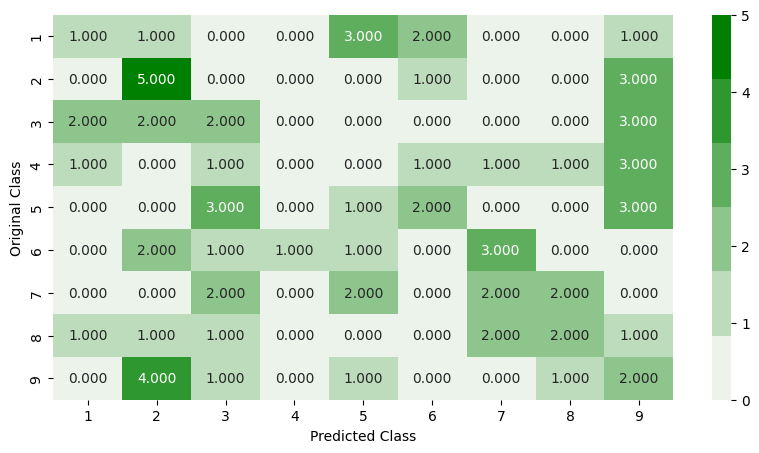

-------------------------------------------------- Precision matrix --------------------------------------------------


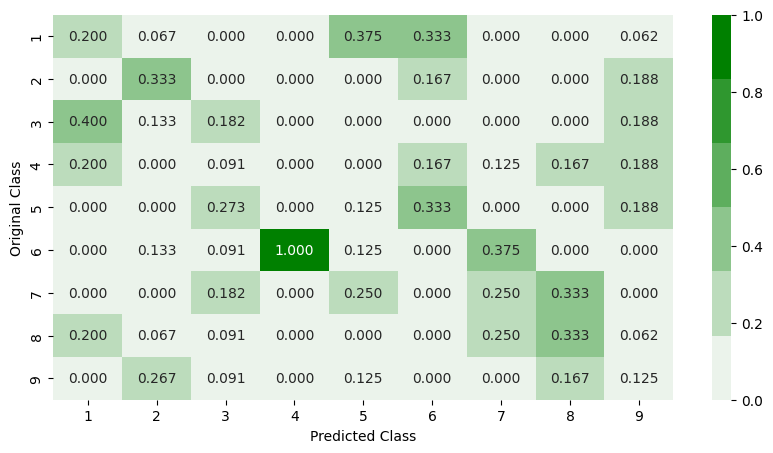

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


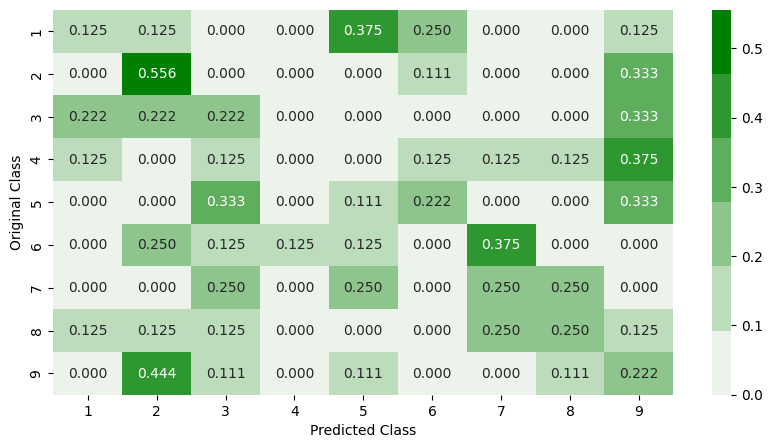

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [319]:
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

In [321]:
predict_y = k_cfl.predict(X_test_asm)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test_asm, predict_y, target_names=target))




---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.06      0.12      0.08         8
           2       0.50      0.56      0.53         9
           3       0.15      0.33      0.21         9
           4       0.19      0.38      0.25         8
           5       0.50      0.11      0.18         9
           6       0.00      0.00      0.00         8
           7       0.67      0.25      0.36         8
           8       0.40      0.25      0.31         8
           9       0.00      0.00      0.00         9

    accuracy                           0.22        76
   macro avg       0.27      0.22      0.21        76
weighted avg       0.27      0.22      0.21        76



/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

log_loss for c =  1e-05 is 2.1532027625223495
log_loss for c =  0.0001 is 2.1548670724171184
log_loss for c =  0.001 is 2.1548518612001186
log_loss for c =  0.01 is 2.154621220551378
log_loss for c =  0.1 is 2.153656089448038
log_loss for c =  1 is 2.161790626536366
log_loss for c =  10 is 2.1368754814293145
log_loss for c =  100 is 2.1052588137889985
log_loss for c =  1000 is 2.1085927114733036


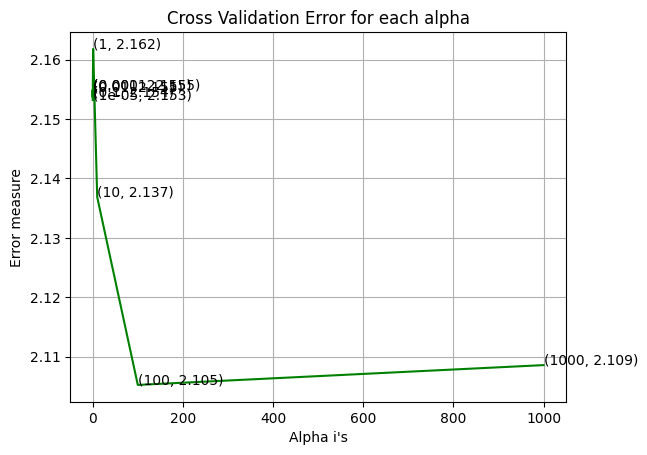

/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

log loss for train data 1.982164722998146
log loss for cv data 2.1052588137889985
log loss for test data 2.083262401116763
Accuracy :  18.421052631578945
=========================********RECALL[[0.         0.         0.         0.         0.33333333 0.
  0.44444444 0.22222222 0.        ]
 [0.         0.75       0.         0.         0.         0.
  0.         0.125      0.125     ]
 [0.         0.25       0.         0.         0.         0.
  0.625      0.125      0.        ]
 [0.         0.         0.25       0.         0.         0.25
  0.25       0.125      0.125     ]
 [0.         0.         0.22222222 0.         0.         0.11111111
  0.44444444 0.22222222 0.        ]
 [0.         0.11111111 0.11111111 0.         0.11111111 0.11111111
  0.33333333 0.22222222 0.        ]
 [0.         0.         0.         0.         0.         0.125
  0.75       0.125      0.        ]
 [0.         0.11111111 0.         0.         0.         0.
  0.77777778 0.11111111 0.        ]
 [0.         0.5  

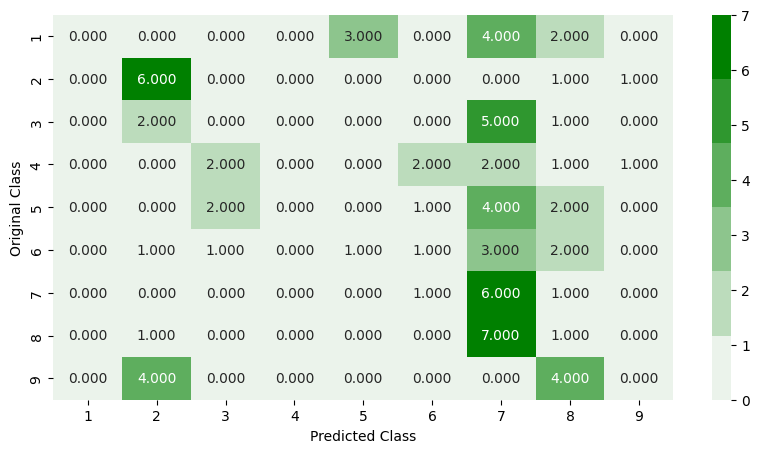

-------------------------------------------------- Precision matrix --------------------------------------------------


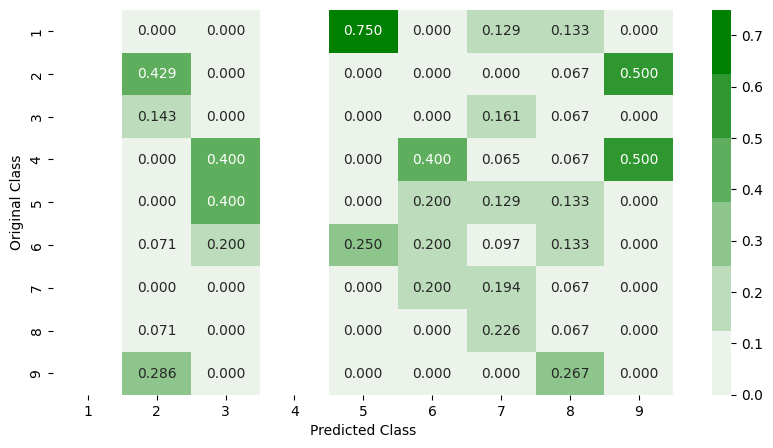

Sum of columns in precision matrix [nan  1.  1. nan  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


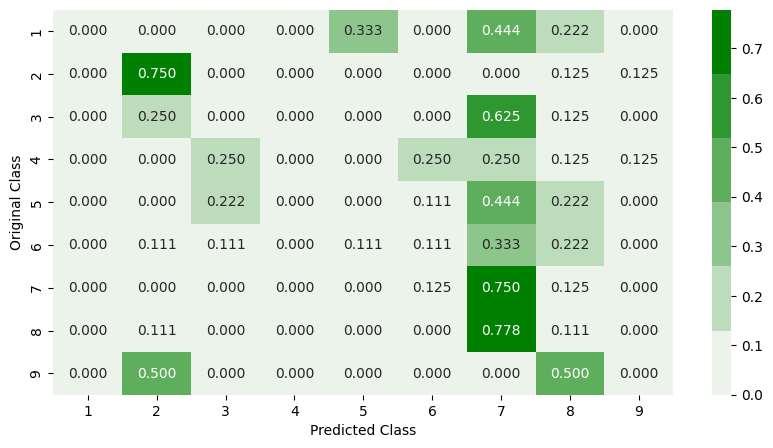

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [326]:
# Logistic Regression
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))


In [327]:
predict_y = logisticR.predict(X_test_asm)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test_asm, predict_y, target_names=target))


---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.50      0.11      0.18         9
           2       0.45      0.62      0.53         8
           3       0.14      0.12      0.13         8
           4       0.17      0.12      0.14         8
           5       0.11      0.11      0.11         9
           6       0.33      0.44      0.38         9
           7       0.25      0.50      0.33         8
           8       0.14      0.11      0.12         9
           9       0.00      0.00      0.00         8

    accuracy                           0.24        76
   macro avg       0.23      0.24      0.21        76
weighted avg       0.24      0.24      0.21        76



In [230]:
print(f"{X_cv_asm.shape}, {y_cv_asm.shape}")

(61, 45), (61,)


178970.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178970.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178970.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178970.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178970.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178971.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178971.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178971.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178971.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178972.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
178972.32s - pydevd: Sending m

log_loss for c =  10 is 2.033345860800304
log_loss for c =  50 is 2.0830752562549173
log_loss for c =  100 is 2.0845891319843246
log_loss for c =  500 is 2.070316685969963
log_loss for c =  1000 is 2.067306275632257
log_loss for c =  2000 is 2.064622460449155
log_loss for c =  3000 is 2.0653628509579716


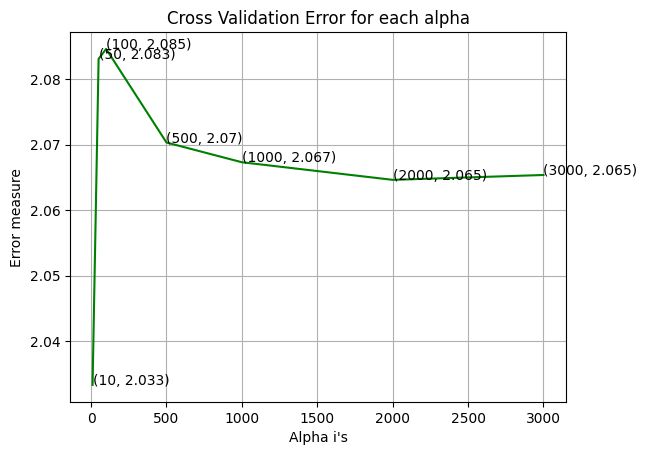

For values of best alpha =  10 The train log loss is: 1.087072637072867
For values of best alpha =  10 The cross validation log loss is: 2.033345860800304
For values of best alpha =  10 The test log loss is: 2.0398851045274617
Accuracy :  27.631578947368425
=========================********RECALL[[0.11111111 0.         0.11111111 0.33333333 0.         0.22222222
  0.         0.22222222 0.        ]
 [0.125      0.375      0.         0.125      0.         0.25
  0.         0.         0.125     ]
 [0.         0.         0.75       0.125      0.         0.
  0.125      0.         0.        ]
 [0.25       0.         0.125      0.25       0.25       0.125
  0.         0.         0.        ]
 [0.11111111 0.         0.         0.22222222 0.         0.33333333
  0.11111111 0.11111111 0.11111111]
 [0.22222222 0.         0.         0.         0.44444444 0.22222222
  0.         0.         0.11111111]
 [0.         0.         0.25       0.125      0.         0.
  0.625      0.         0.        ]
 [

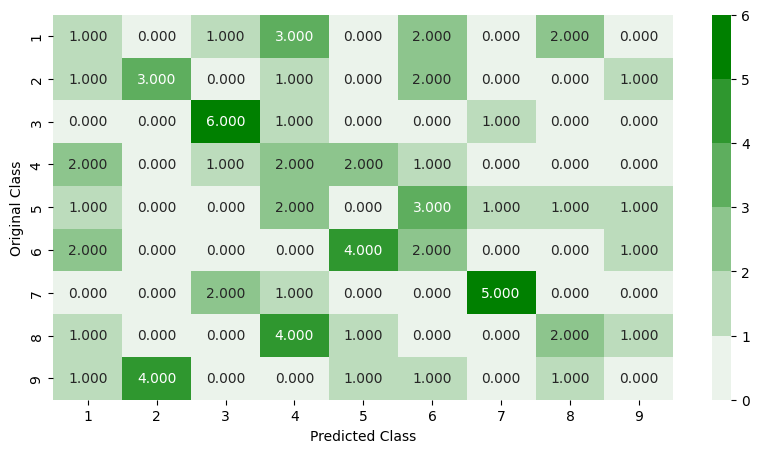

-------------------------------------------------- Precision matrix --------------------------------------------------


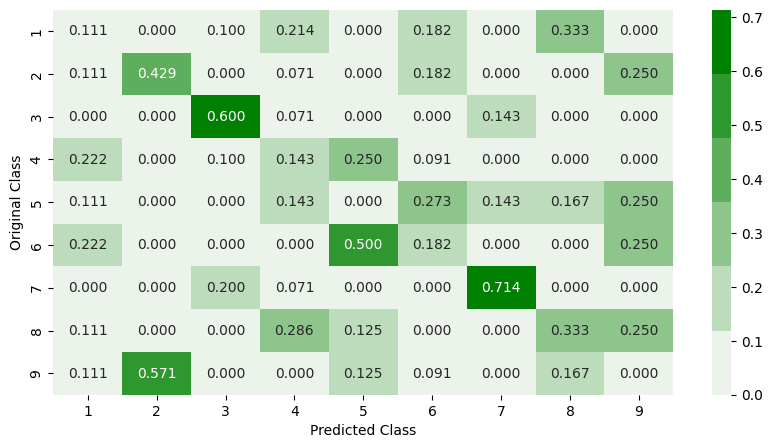

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


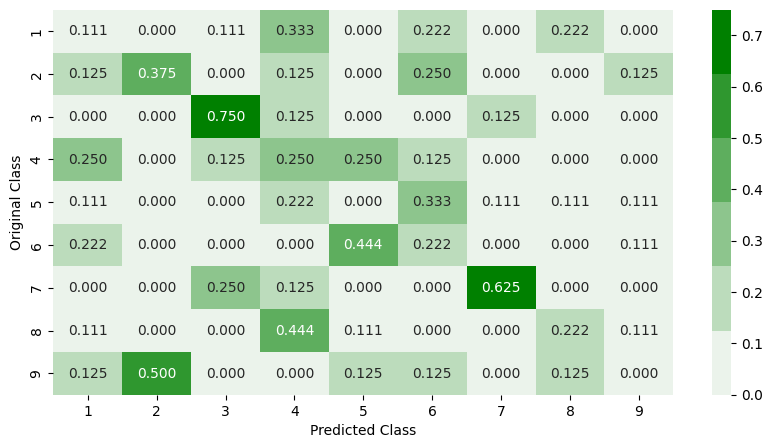

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [328]:
# Random Forest
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

In [337]:
y_train_asm+=1
y_cv_asm+=1
y_test_asm+=1

In [338]:
predict_y = r_cfl.predict(X_test_asm)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test_asm, predict_y, target_names=target))

---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.08      0.11      0.10         9
           2       0.33      0.38      0.35         8
           3       0.36      0.50      0.42         8
           4       0.09      0.12      0.11         8
           5       0.22      0.22      0.22         9
           6       0.33      0.22      0.27         9
           7       0.50      0.62      0.56         8
           8       0.60      0.33      0.43         9
           9       0.00      0.00      0.00         8

    accuracy                           0.28        76
   macro avg       0.28      0.28      0.27        76
weighted avg       0.28      0.28      0.27        76



In [235]:
y_train_asm = y_train_asm.subtract(1)
y_test_asm = y_test_asm.subtract(1)
y_cv_asm = y_cv_asm.subtract(1)


In [234]:
X_cv_asm.head()


,HEADER:,.text:,.idata:,.data:,.edata:,.rsrc:,.tls:,.reloc:,jmp,mov,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,size
283,0.95,0.008102,0.011238,0.002529,0.0,0.000239,0.0,0.0,0.000000,0.006665,...,0.017970,0.004383,0.017281,0.011889,0.001527,0.0,0.111111,0.0,0.018922,0.067869
286,0.95,0.004023,0.009881,0.000420,0.0,0.000239,0.0,0.0,0.000000,0.001564,...,0.003478,0.001381,0.006588,0.004901,0.004342,0.0,0.111111,0.0,0.016043,0.090347
240,0.90,0.020748,0.017348,0.002679,0.0,0.000239,0.0,0.0,0.010834,0.018703,...,0.000435,0.015435,0.000576,0.040735,0.002147,0.0,0.166667,0.0,0.035376,0.009815
337,0.95,0.012604,0.021647,0.090794,0.0,0.000000,0.0,1.0,0.034205,0.013240,...,0.011980,0.012194,0.006624,0.044047,0.003459,0.0,0.064815,0.0,0.028383,0.009675
24,0.90,0.022232,0.015538,0.001828,0.0,0.000239,0.0,0.0,0.010834,0.025318,...,0.000483,0.020585,0.000504,0.051234,0.002314,0.0,0.138889,0.0,0.031263,0.007296


log_loss for c =  10 is 1.5531367274658754
log_loss for c =  50 is 1.6061328411627849
log_loss for c =  100 is 1.6264874062923116
log_loss for c =  500 is 1.6738313412991894
log_loss for c =  1000 is 1.6785568121771228
log_loss for c =  2000 is 1.679415000889573


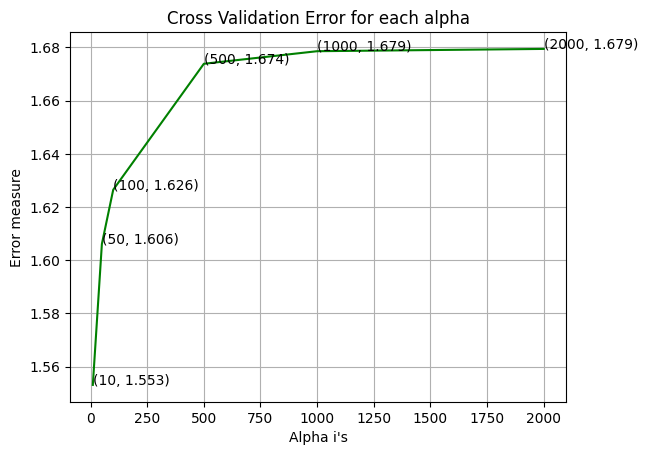

For values of best alpha =  10 The train log loss is: 0.8119842553141021
For values of best alpha =  10 The cross validation log loss is: 1.5531367274658754
For values of best alpha =  10 The test log loss is: 1.5939354595548565
Accuracy :  51.31578947368421
-------------------------------------------------- Confusion matrix --------------------------------------------------


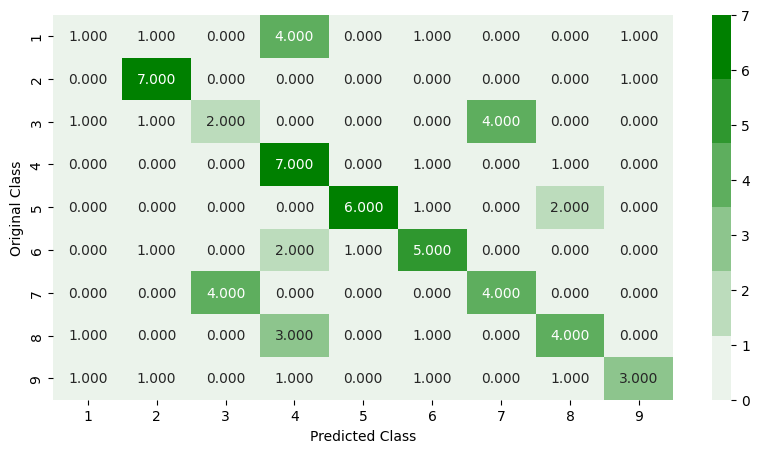

-------------------------------------------------- Precision matrix --------------------------------------------------


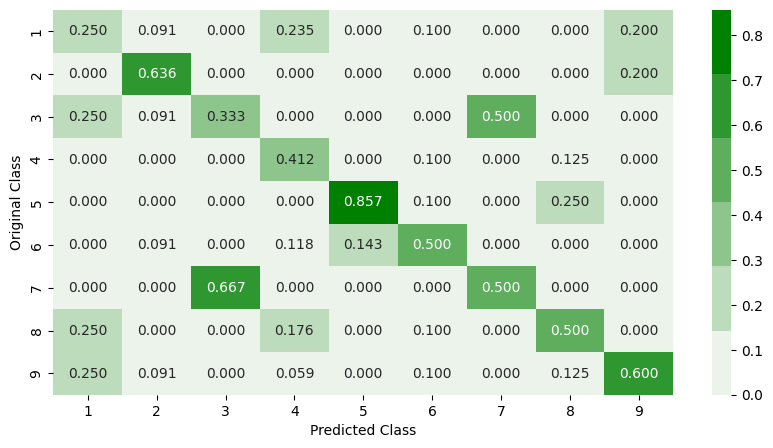

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


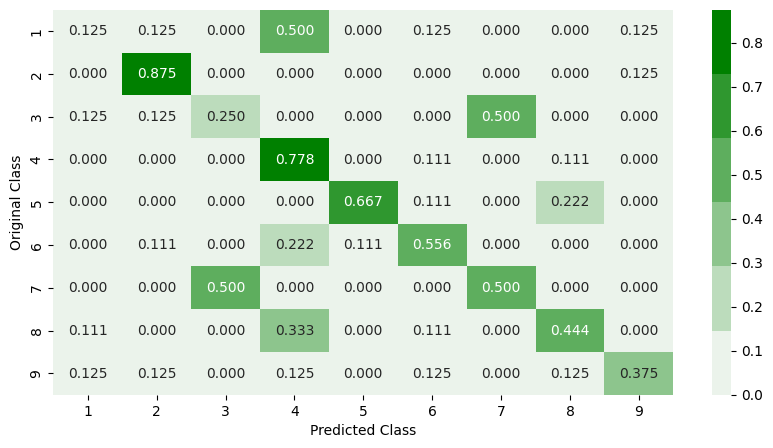

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [239]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

In [339]:
y_test_asm-=1
y_cv_asm-=1
y_train_asm-=1

In [340]:
x_cfl = XGBClassifier()

prams = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [2,4,6,8,10,12],
    'max_depth': [3, 5, 10],
    'colsample_bytree': [0.1, 0.3, 0.5, 1],
    'subsample': [0.1, 0.3, 0.5, 1]
}
random_cfl = RandomizedSearchCV(
    x_cfl, param_distributions=prams, verbose=10, n_jobs=-1,)
random_cfl.fit(X_train_asm, y_train_asm)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


179504.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179504.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179504.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179505.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179505.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179505.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179505.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179505.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
179506.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 1/5; 1/10] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=8, subsample=0.3
[CV 1/5; 1/10] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=8, subsample=0.3;, score=0.224 total time=   0.1s
[CV 1/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5


179506.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 1/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5;, score=0.204 total time=   0.0s
[CV 2/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5
[CV 2/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5;, score=0.292 total time=   0.0s
[CV 3/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5
[CV 3/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5;, score=0.312 total time=   0.0s
[CV 4/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5
[CV 4/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5;, score=0.396 total time=   0.1s
[CV 5/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=4, subsample=0.5
[CV 5/5; 2/10] END colsample

179506.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 2/5; 1/10] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=8, subsample=0.3;, score=0.229 total time=   0.1s
[CV 2/5; 3/10] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=12, subsample=1;, score=0.521 total time=   0.2s
[CV 3/5; 3/10] START colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=12, subsample=1
[CV 4/5; 3/10] START colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=12, subsample=1


179506.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 3/5; 3/10] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=12, subsample=1;, score=0.417 total time=   0.2s
[CV 1/5; 4/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=12, subsample=0.3
[CV 4/5; 3/10] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=12, subsample=1;, score=0.583 total time=   0.2s
[CV 2/5; 4/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=12, subsample=0.3
[CV 1/5; 4/10] END colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=12, subsample=0.3;, score=0.469 total time=   0.1s
[CV 3/5; 4/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=12, subsample=0.3
[CV 2/5; 4/10] END colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=12, subsample=0.3;, score=0.396 total time=   0.1s[CV 3/5; 1/10] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=8, subsample=0.3

[CV 4/5; 4/10] START colsample_bytre

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [2, 4, 6, 8, 10, 12],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [333]:
print(random_cfl.best_params_)


{'subsample': 1, 'n_estimators': 6, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [341]:
x_cfl=XGBClassifier(n_estimators=6, learning_rate=0.15, colsample_bytree=0.5, max_depth=10, subsample=1.0)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.8183901076739163
cv loss 1.7820133047530486
test loss 1.7862340547296818


Accuracy :  46.05263157894737
=========================********RECALL[[0.11111111 0.33333333 0.11111111 0.22222222 0.11111111 0.11111111
  0.         0.         0.        ]
 [0.         0.75       0.         0.         0.         0.125
  0.         0.         0.125     ]
 [0.         0.125      0.75       0.         0.         0.
  0.125      0.         0.        ]
 [0.         0.25       0.         0.5        0.125      0.125
  0.         0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.44444444 0.
  0.         0.22222222 0.        ]
 [0.22222222 0.22222222 0.         0.11111111 0.         0.11111111
  0.         0.22222222 0.11111111]
 [0.         0.25       0.125      0.         0.125      0.
  0.5        0.         0.        ]
 [0.11111111 0.         0.         0.         0.11111111 0.
  0.         0.55555556 0.22222222]
 [0.125      0.25       0.         0.         0.         0.
  0.         0.125      0.5       ]]********================================
====

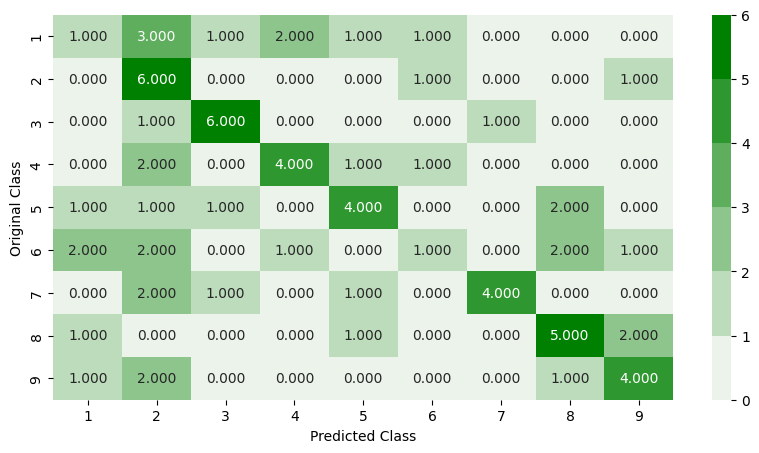

-------------------------------------------------- Precision matrix --------------------------------------------------


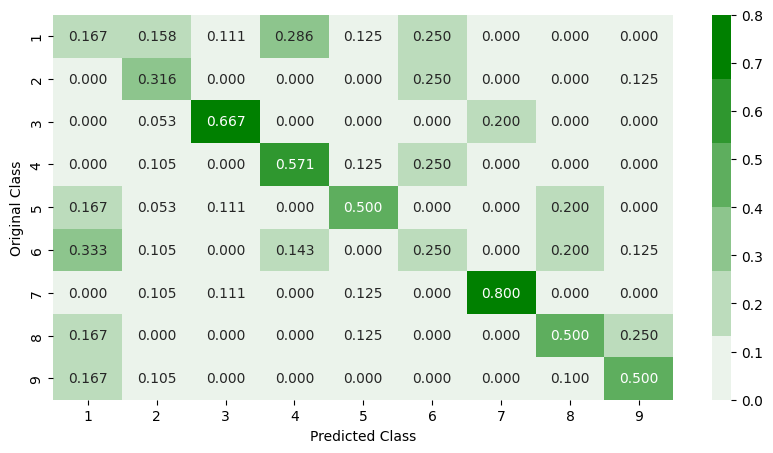

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


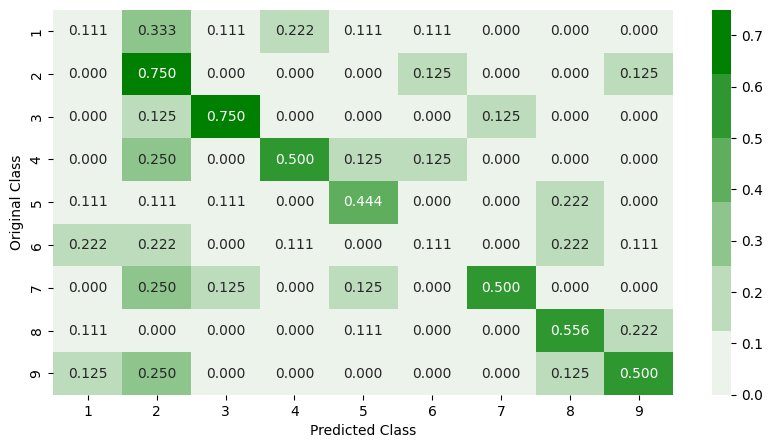

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [342]:
plot_confusion_matrix(y_test_asm, c_cfl.predict(X_test_asm))

In [343]:
predict_y = x_cfl.predict(X_test_asm)
print("---------------------test---------------------------")
print("---------------------test---------------------------")
print(classification_report(y_test_asm, predict_y, target_names=target))

---------------------test---------------------------
---------------------test---------------------------
              precision    recall  f1-score   support

           1       0.14      0.22      0.17         9
           2       0.33      0.62      0.43         8
           3       0.67      0.75      0.71         8
           4       0.29      0.25      0.27         8
           5       0.44      0.44      0.44         9
           6       0.60      0.33      0.43         9
           7       0.33      0.25      0.29         8
           8       0.44      0.44      0.44         9
           9       1.00      0.25      0.40         8

    accuracy                           0.39        76
   macro avg       0.47      0.40      0.40        76
weighted avg       0.47      0.39      0.40        76



BOTH ASM AND BYTE FEATURES

In [62]:

result_asm.to_csv("final_features_asms.csv", index=False)
asm_features_unigram = result_asm
result_asm.head(30)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,DpNvYX1qedHLiQnRhF98,0.85,0.003480,0.0,0.000000,0.000414,0.000000,0.000421,0.000000,0.000239,...,0.004298,0.004392,0.002683,0.000024,0.0,0.037037,0.000000,0.000000,7,0.000701
1,27wyEMFY6QlxGfzpZ3iq,0.90,0.046587,0.0,0.081687,0.061074,0.000000,0.000483,0.000000,0.000000,...,0.036634,0.044247,0.022653,0.021043,0.0,0.138889,0.009210,0.171534,1,0.008840
2,0giIqhw6e4mrHYzKFl8T,0.00,0.012617,0.0,0.021270,0.001466,0.000000,0.647104,0.000000,0.000000,...,0.012706,0.010693,0.011095,0.005797,0.0,0.092593,0.016884,0.027149,8,0.007146
3,asKPnzUXjShMc0Tl6Wge,0.00,0.015148,0.0,0.022024,0.001500,0.000000,0.446703,0.000000,0.000000,...,0.018266,0.014113,0.016592,0.006943,0.0,0.092593,0.016884,0.028383,5,0.073949
4,gyOPeu8vNMszC1dH9cTm,0.00,0.064827,0.0,0.004148,0.004643,0.000000,0.016649,0.000000,0.000000,...,0.017447,0.009469,0.008081,0.003388,0.0,0.027778,0.000000,0.004525,3,0.000867
5,bGPHZFpAL3N957064wzj,0.90,0.045721,0.0,0.080555,0.575277,0.000000,0.000460,0.000000,0.000000,...,0.031023,0.045831,0.025236,0.026172,0.0,0.601852,0.009210,0.167832,5,0.003973
6,Cz3Vx6ERt5LkrXy9BMOK,0.85,0.007970,0.0,0.018253,0.003743,0.000000,0.000918,0.001718,0.000239,...,0.004861,0.007632,0.013810,0.001193,0.0,0.111111,0.000000,0.040313,7,0.000701
7,cYb4XuNSqOA9IFLHseG1,0.00,0.033246,0.0,0.034922,0.333657,0.000000,0.011452,0.000000,0.000000,...,0.024235,0.026714,0.044809,0.008660,0.0,0.046296,0.023024,0.049362,5,0.078476
8,hcwtORMJqx6kPiQzVjbX,0.95,0.004784,0.0,0.011012,0.000397,0.000000,0.000061,0.000000,0.000239,...,0.001671,0.008569,0.004868,0.006489,0.0,0.111111,0.000000,0.016043,8,0.007116
9,Fnda3PuqJT6Ep5vjOWCk,0.85,0.000000,0.0,0.013426,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.004707,0.007957,0.023911,0.002791,0.0,0.074074,0.000000,0.027561,5,0.015322


In [61]:
byte_features_unigram = pd.read_csv("./final_features_bytes.csv")
byte_features_unigram = normalize(byte_features_unigram)
byte_features_unigram.head(30)


,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,ajpIxyzuMmAlJ9cw2HTY,0.008734,0.000269,0.000005,0.000067,0.000009,0.000092,0.000001,0.000151,0.000130,...,0.000158,0.000000,0.000007,0.000230,0.000267,0.000000,0.006913,0.323572,0.312026,7
1,0HKFs3AXTt1IrOl52eVu,0.035674,0.006727,0.000304,0.003731,0.000381,0.002856,0.000191,0.017988,0.003177,...,0.101280,0.005151,0.005073,0.051052,0.015329,0.020113,0.046472,0.001828,0.015168,8
2,7Y5Egr0XjO8UIvNFA16L,0.027804,0.007713,0.000469,0.004731,0.001006,0.003553,0.000277,0.008710,0.006077,...,0.053721,0.001476,0.001827,0.031109,0.006612,0.010257,0.029878,0.002362,0.016251,8
3,bnTwRQSvo3CLKsgGaI45,0.143639,0.012176,0.000845,0.009080,0.001173,0.009603,0.000992,0.022760,0.012008,...,0.071101,0.003033,0.002868,0.017140,0.012631,0.023984,0.025616,0.000391,0.049837,9
4,cIojVJGQOtrL0S1ApeDY,0.015752,0.020618,0.002888,0.014980,0.002985,0.014180,0.001526,0.040938,0.028969,...,0.129404,0.005933,0.005994,0.037818,0.024313,0.043745,0.034052,0.056838,0.110509,5
5,k5wXQtLF1RumvGs8fSZc,0.005762,0.021750,0.003157,0.021172,0.003254,0.019074,0.002564,0.072332,0.030044,...,0.288197,0.013882,0.013051,0.083678,0.055060,0.089551,0.030786,0.002790,0.118093,6
6,br3oAnTeGyDp97XkzCOS,0.017832,0.025125,0.003283,0.023813,0.003485,0.019903,0.002592,0.076346,0.033596,...,0.312372,0.014229,0.013779,0.090019,0.058410,0.097697,0.044144,0.003328,0.132178,6
7,cMdF9wsSLT2eKh7zxliB,0.028246,0.006962,0.000392,0.004405,0.000507,0.003460,0.000261,0.009619,0.004399,...,0.045505,0.001631,0.001570,0.028260,0.007501,0.012068,0.030039,0.002641,0.016251,8
8,5tQ4OCNKrDpPhWB7ngou,0.004874,0.003801,0.000628,0.005327,0.000779,0.003819,0.000502,0.015603,0.006159,...,0.057355,0.002362,0.002483,0.023022,0.010644,0.016492,0.004277,0.020278,0.028169,4
9,Atpz1WjXkcIo7l5TPh9Y,0.005607,0.011828,0.001746,0.012137,0.002029,0.010207,0.001321,0.043021,0.018166,...,0.161637,0.007616,0.007799,0.057761,0.032378,0.054455,0.015188,0.102972,0.160347,4


In [63]:
byte_features_unigram.to_csv("final_features_bytes.csv", index=False)


In [64]:
print(byte_features_unigram.shape)
print(asm_features_unigram.shape)


(378, 260)
(378, 54)


In [65]:
result_x = pd.merge(byte_features_unigram, asm_features_unigram.drop(
    ['Class'], axis=1), on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID', 'Class', 'retf', '.bss:',
                         '.Pav:', '.rdata:', '.CODE', '.BSS:', 'rtn'], axis=1)
result_x.head()


,0,1,2,3,4,5,6,7,8,9,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_y
0,0.008734,0.000269,0.000005,0.000067,0.000009,0.000092,0.000001,0.000151,0.000130,0.000017,...,0.004637,0.000648,0.001800,0.001192,0.003149,0.0,0.000000,0.000000,0.000000,0.000646
1,0.035674,0.006727,0.000304,0.003731,0.000381,0.002856,0.000191,0.017988,0.003177,0.000948,...,0.001014,0.020773,0.000648,0.051366,0.002314,0.0,0.138889,0.000000,0.031263,0.010869
2,0.027804,0.007713,0.000469,0.004731,0.001006,0.003553,0.000277,0.008710,0.006077,0.001315,...,0.089658,0.046475,0.086262,0.139957,0.043898,0.0,0.462963,0.027629,0.136981,0.007267
3,0.143639,0.012176,0.000845,0.009080,0.001173,0.009603,0.000992,0.022760,0.012008,0.002569,...,0.003188,0.001774,0.005832,0.005067,0.004342,0.0,0.111111,0.000000,0.016043,0.067677
4,0.015752,0.020618,0.002888,0.014980,0.002985,0.014180,0.001526,0.040938,0.028969,0.006910,...,0.010048,0.013815,0.010981,0.009604,0.006442,0.0,0.064815,0.016884,0.027561,0.073717


In [67]:
result_x.shape
result_x.to_csv("final_features_combined.csv", index=False)


In [248]:
result_x = pd.read_csv("final_features_combined.csv")
result_x.head()
result_x.shape

(378, 303)

/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shubham/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


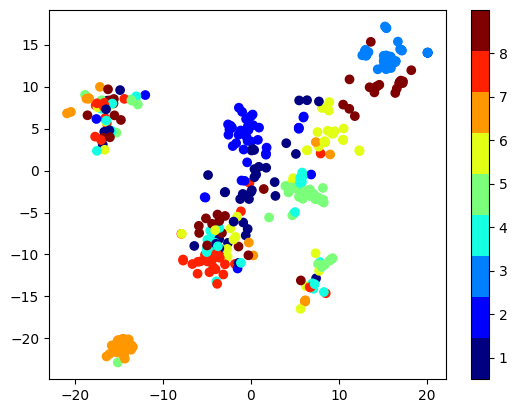

In [249]:

xtsne = TSNE(perplexity=30)
results = xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()


In [70]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(
    result_x, result_y, stratify=result_y, test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.20)


42387.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42387.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42388.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42388.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42388.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42388.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42389.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42389.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42389.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42389.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
42389.93s - pydevd: Sending message rela

log_loss for c =  10 is 0.7105853281802996
log_loss for c =  50 is 0.6407293201543734
log_loss for c =  100 is 0.6342179293892147
log_loss for c =  500 is 0.6212486521726065
log_loss for c =  1000 is 0.6169039774789596
log_loss for c =  2000 is 0.6168001280065913
log_loss for c =  3000 is 0.6161942187985816


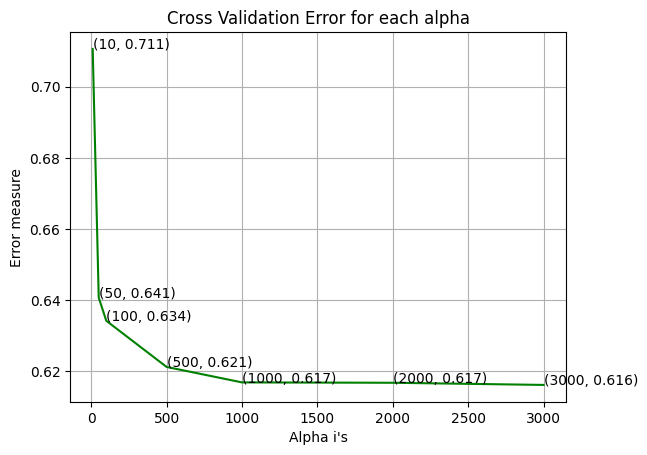

For values of best alpha =  3000 The train log loss is: 0.25837162397089114
For values of best alpha =  3000 The cross validation log loss is: 0.6161942187985816
For values of best alpha =  3000 The test log loss is: 0.5556463032679642


In [71]:
from sklearn.ensemble import RandomForestClassifier
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in alpha:
    r_cfl = RandomForestClassifier(n_estimators=i, random_state=42, n_jobs=-1)
    r_cfl.fit(X_train_merge, y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(
        log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)),
                (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl = RandomForestClassifier(
    n_estimators=alpha[best_alpha], random_state=42, n_jobs=-1)
r_cfl.fit(X_train_merge, y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The train log loss is:", log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The cross validation log loss is:", log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The test log loss is:", log_loss(y_test_merge, predict_y))


In [90]:
# y_cv_merge+=1
y_cv_merge.unique()


array([3, 2, 8, 6, 1, 4, 7, 0, 5])

In [ ]:
y_train_merge.unique()


In [91]:
x_cfl = XGBClassifier()

prams = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 200, 500, 1000, 2000],
    'max_depth': [3, 5, 10],
    'colsample_bytree': [0.1, 0.3, 0.5, 1],
    'subsample': [0.1, 0.3, 0.5, 1]
}
random_cfl = RandomizedSearchCV(
    x_cfl, param_distributions=prams, verbose=10, n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.3
[CV 2/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.3
[CV 3/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.3
[CV 4/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.3
[CV 5/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.3
[CV 1/5; 2/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=100, subsample=0.1
[CV 2/5; 2/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=100, subsample=0.1
[CV 3/5; 2/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=100, subsample=0.1
[CV 4/5; 2/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=10, 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [92]:
print(random_cfl.best_params_)


{'subsample': 0.3, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


For values of best alpha =  3000 The train log loss is: 1.9933163637514557
For values of best alpha =  3000 The cross validation log loss is: 2.2140574832773687
For values of best alpha =  3000 The test log loss is: 2.2916102103796923
Accuracy :  9.210526315789473
-------------------------------------------------- Confusion matrix --------------------------------------------------


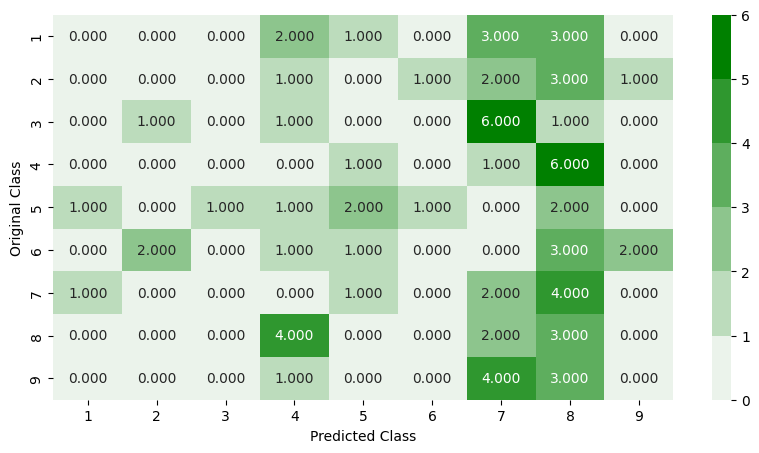

-------------------------------------------------- Precision matrix --------------------------------------------------


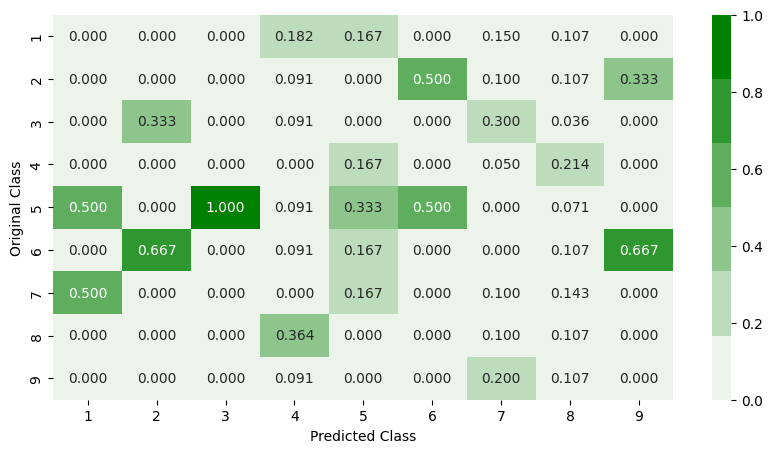

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


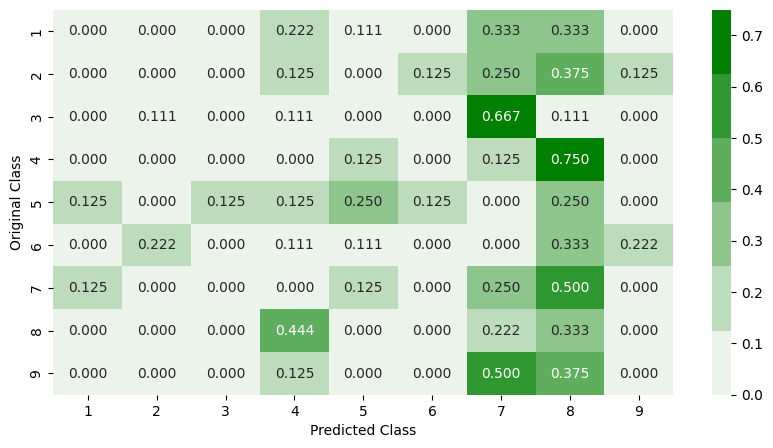

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [100]:
x_cfl = XGBClassifier(n_estimators=2000, max_depth=10, learning_rate=0.15,
                      colsample_bytree=0.3, subsample=0.3, nthread=-1)
x_cfl.fit(X_train_merge, y_train_merge, verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The train log loss is:", log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The cross validation log loss is:", log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ',
      alpha[best_alpha], "The test log loss is:", log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_merge))


In [101]:
#  Important folders for storing final features
import pickle as pkl

if not os.path.isdir("./featurization"):
    os.makedirs("./featurization")


if not os.path.isdir("./featurization/featurization_final"):
    os.mkdir("./featurization/featurization_final")


# Creating and writing to a file named "class_labels.pkl" to get class class_labels and ID from byte unigrams dataframe and save it for later use

class_labels = result_y

with open('./featurization/class_labels.pkl', 'wb') as file:
    pkl.dump(class_labels, file)

'''
https://www.datacamp.com/community/tutorials/pickle-python-tutorial

To open the file for writing, simply use the open() function. The first argument should be the name of your file. The second argument is 'wb'. The w means that you'll be writing to the file, and b refers to binary mode. This means that the data will be written in the form of byte objects.
'''

# Load the class class_labels for training with random forest feature selector

with open('./featurization/class_labels.pkl', 'rb') as file:
    class_labels = pkl.load(file)


In [107]:
#  Bigram Feature extraction from byte files
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
byte_bigram_vocab = []


def byte_bigram():

    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' + byte_vocab.split(',')[j])
    return len(byte_bigram_vocab)


In [108]:
byte_bigram_vocab_len = byte_bigram()
print(byte_bigram_vocab_len)


66049


In [109]:
byte_bigram_vocab[:5]


['00 00', '00 01', '00 02', '00 03', '00 04']

In [110]:
byte_trigram_vocab = []


def byte_trigram():

    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            for k in range(0, len(byte_vocab.split(','))):
                byte_trigram_vocab.append(
                    v + ' ' + byte_vocab.split(',')[j]+' '+byte_vocab.split(',')[k])
    print(len(byte_trigram_vocab))


byte_trigram()


16974593


In [111]:
byte_trigram_vocab[:5]


['00 00 00', '00 00 01', '00 00 02', '00 00 03', '00 00 04']

0it [00:00, ?it/s]


ValueError: inconsistent shapes

In [116]:
import scipy

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(
), lowercase=False, ngram_range=(2, 2), vocabulary=byte_bigram_vocab)

# For Explanations on "tokenizer=lambda x: x.split()"
# Refer - https://stackoverflow.com/a/37884104/1902852
# Without this "??" was not getting vectorized properly

file_list_byte_files = os.listdir('./train/bytes')

features = ["ID"]+vectorizer.get_feature_names()

byte_file_bigram_df = pd.DataFrame(columns=features)

# Creating "featurization/byte_files_bigram_df.csv" and writng to it the full bi-gram data frame
with open("./featurization/byte_files_bigram_df.csv", mode='w') as byte_file_bigram_df:
    byte_file_bigram_df.write(','.join(map(str, features)))
    byte_file_bigram_df.write('\n')
    for _, file in tqdm(enumerate(file_list_byte_files)):
        file_id = file.split(".")[0]  # ID of each file
        file = open('./train/bytes/' + file)
        # corpus_byte_codes holds all the byte codes for a given file
        corpus_byte_codes = [file.read().replace('\n', ' ').lower()]
        # Returning a sparse vector containing all the bigram counts from the corpus_byte_codes
        bigrams_counts = vectorizer.transform(corpus_byte_codes)

        # Update each row of our dataframe with the bigram counts of the respective file
        row = scipy.sparse.csr_matrix(bigrams_counts).toarray()

        # Write a single row in the CSV file
        byte_file_bigram_df.write(','.join(map(str, [file_id]+list(row[0]))))

        byte_file_bigram_df.write('\n')

        file.close()


/home/shubham/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
378it [06:35,  1.05s/it]


In [253]:
X_byte_bigram_all_df = pd.read_csv("./featurization/byte_files_bigram_df.csv")

display(X_byte_bigram_all_df.head(2))

,ID,00 00,00 01,00 02,00 03,00 04,00 05,00 06,00 07,00 08,...,?? f7,?? f8,?? f9,?? fa,?? fb,?? fc,?? fd,?? fe,?? ff,?? ??
0,5tQ4OCNKrDpPhWB7ngou,2598,3,2,2,0,0,2,5,4,...,0,0,0,0,0,0,0,0,0,72506
1,cYb4XuNSqOA9IFLHseG1,7497,84,26,44,40,25,11,17,29,...,0,0,0,0,0,0,0,0,0,297591


In [254]:
X_byte_bigram_all_df.shape

(378, 66050)

In [118]:
%%time


from sklearn.feature_selection import SelectKBest, chi2, f_regression

select_kbest_object = SelectKBest(score_func=chi2, k=2000)
# SelectKBest scores the features using a function, which is chi2 here
# Then "removes all but the k highest scoring features"

# Need to remove "ID" column, else will get below error 
# "SelectKBest fit: ValueError: could not convert string to float"

most_imp_features_byte_bigram = select_kbest_object.fit(X_byte_bigram_all_df.drop("ID", axis=1), class_labels)

# most_imp_features_byte_bigram.scores_ => gives an array of form 
# array([9.79531407e+05, 4.26642398e+04, 1.78812060e+04, ..., 4.33426736e+07])
# So now creating a df from this array
most_imp_byte_bigram_feature_score_df = pd.DataFrame(most_imp_features_byte_bigram.scores_)

# Creating a df from all the column names from the original full X_byte_bigram_all_df df
most_imp_byte_bigram_columns_df = pd.DataFrame(X_byte_bigram_all_df.columns)

CPU times: user 1.97 s, sys: 819 ms, total: 2.79 s
Wall time: 2.28 s


In [119]:
# Concat the feature scores along with the feature names in a byte_bigram_df_important_feature_score, 
# From this we will get all feature names later, to be matched against X_byte_bigram_all_df - to extract ONLY the best features from the bigrams df data
byte_bigram_df_important_feature_score = pd.concat([most_imp_byte_bigram_columns_df, most_imp_byte_bigram_feature_score_df],axis=1)

byte_bigram_df_important_feature_score.columns = ["Byte Bigram Top 2000 Feature Names","Byte Bigram Top 2000 Feature Score"]

# Find the top 2000 features along with their scores

# byte_bigram_df_important_feature_score=byte_bigram_df_important_feature_score.nlargest(1000, "Byte Bigram Top 2000 Feature Score")

# Return the first 2000 rows with the largest values in the specified column ( "Byte Bigram Top 2000 Feature Score" )
# in descending order. The columns that are not specified are returned as well, but not used for ordering.
byte_bigram_df_important_feature_score = byte_bigram_df_important_feature_score.nlargest(10, "Byte Bigram Top 2000 Feature Score")

byte_bigram_df_important_feature_score.head(2)

,Byte Bigram Top 2000 Feature Names,Byte Bigram Top 2000 Feature Score
66048,?? ff,1.010621e+07
52632,cc cb,2.670282e+06


In [120]:
# Getting the list of first 2000 feature names
top_2000_most_imp_byte_bigram_feature_names = list(byte_bigram_df_important_feature_score["Byte Bigram Top 2000 Feature Names"])

# top_2000_byte_bigram_features = dd.concat([X_byte_bigram_all_df["ID"], X_byte_bigram_all_df[top_2000_most_imp_byte_bigram]], axis=1)
top_2000_byte_bigram_features = pd.concat([X_byte_bigram_all_df["ID"], X_byte_bigram_all_df[top_2000_most_imp_byte_bigram_feature_names]], axis=1)

top_2000_byte_bigram_features.to_csv("./featurization/featurization_final/top_2000_imp_byte_bigram_df.csv",index=None)

print(top_2000_byte_bigram_features.shape)
top_2000_byte_bigram_features.head(2)

(378, 11)


,ID,?? ff,cc cb,87 86,de dd,a0 9f,db da,39 af,39 ab,39 b1,39 35
0,5tQ4OCNKrDpPhWB7ngou,0,0,1,1,0,0,1,1,4,1
1,cYb4XuNSqOA9IFLHseG1,0,5,0,2,3,5,3,4,4,3


ASM Files - Convert the ASM files to images

In [123]:
%%time

import numpy as np
import os
import codecs
import imageio
import array
from datetime import datetime as dt

if not os.path.isdir("./image_file_asm"):
    os.mkdir( "./image_file_asm")

asmfile_list=os.listdir("./train/asms")

# Function to extract images from ASM files and save them to a specified folder (the second arg to the func)
def extract_images_from_text(arr_of_filenames, folder_to_save_generated_images):  
    for file_name in tqdm(arr_of_filenames):
        
        if(file_name.endswith("asm")):
            this_file = codecs.open("./train/asms/" + file_name, 'rb')
            size_of_current_asm_file = os.path.getsize("./train/asms/"+file_name)        
        
        width_of_file = int(size_of_current_asm_file**0.5)
        
        remainder = size_of_current_asm_file % width_of_file
        
        # To create array of single bytes, passing type code 'B'
        # "B" is for unsigned characters
        array_of_image = array.array('B')
        
        array_of_image.fromfile(this_file, size_of_current_asm_file-remainder)
        
        this_file.close()
        
        arr_of_generated_image = np.reshape(array_of_image[:width_of_file * width_of_file], (width_of_file, width_of_file))
        
        arr_of_generated_image = np.uint8(arr_of_generated_image)
        
        imageio.imwrite(folder_to_save_generated_images+'/' + file_name.split(".")[0] + '.png', arr_of_generated_image)
        
        
# Now invoke the above function

directory_to_save_generated_image = './image_file_asm'

extract_images_from_text(asmfile_list, directory_to_save_generated_image)

100%|██████████| 378/378 [04:02<00:00,  1.56it/s]

CPU times: user 3min 55s, sys: 4.99 s, total: 4min
Wall time: 4min 2s


In [124]:
# Extract the first 800 pixel data from ASM File Images 

file_list_asm_files=os.listdir('./image_file_asm')

with open("./featurization/top_800_image_asm_df.csv", mode='w') as top_800_image_asm_df: #file_list_asm_files = 10868, top_800_image_asm_df=800
    # top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(800)])))
    top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(10)])))
    top_800_image_asm_df.write('\n')
    
    for image in tqdm(file_list_asm_files):
        file_id_asm_files=image.split(".")[0]
        
         # Create a 2 Matrix to contain the image matrix in 2D format
        asm_image_array=imageio.imread("./image_file_asm/"+image)
        
        # Extracting from flattened array the first 800 pixels 
        # asm_image_array=asm_image_array.flatten()[:800]
        asm_image_array=asm_image_array.flatten()[:10]
        top_800_image_asm_df.write(','.join(map(str, [file_id_asm_files]+list(asm_image_array))))
        top_800_image_asm_df.write('\n')

  0%|          | 0/378 [00:00<?, ?it/s]/tmp/ipykernel_147447/2572934590.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  asm_image_array=imageio.imread("./image_file_asm/"+image)
  1%|          | 4/378 [00:00<00:11, 33.06it/s]/usr/lib/python3/dist-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (93373569 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 18%|█▊        | 68/378 [00:04<00:13, 22.64it/s]/usr/lib/python3/dist-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (92775424 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 34%|███▍      | 128/378 [00:07<00:13, 18.73it/s]/usr/lib/python3/dist-packages/PIL/Image.py:2896: DecompressionBombWarning: 

In [125]:
top_800_image_asm_df=pd.read_csv("./featurization/top_800_image_asm_df.csv")
top_800_image_asm_df.head()

,ID,pixel_asm0,pixel_asm1,pixel_asm2,pixel_asm3,pixel_asm4,pixel_asm5,pixel_asm6,pixel_asm7,pixel_asm8,pixel_asm9
0,7upD1xywIeOmibLNPSo4,72,69,65,68,69,82,58,54,68,50
1,8a39lGQmftE0MngbKCqu,72,69,65,68,69,82,58,48,48,52
2,95joqyVh0gaeEIbrv1BA,72,69,65,68,69,82,58,48,48,52
3,HFQTfjJp98VMhYeBrkmd,72,69,65,68,69,82,58,49,48,48
4,jERVLnaTwhHFrZbvNfCy,115,101,103,48,48,48,58,48,48,48


In [128]:
def calculate_bigram(bigram_tokens):
    sentence=""
    vocabulary_list_for_byte_bigrams=[]
    for i in tqdm(range(len(bigram_tokens))):
        for j in range(len(bigram_tokens)):
            bigram=bigram_tokens[i]+" "+bigram_tokens[j]
            sentence=sentence+bigram+","
            vocabulary_list_for_byte_bigrams.append(bigram)
    return vocabulary_list_for_byte_bigrams

Extracting Opcodes Bigrams from ASM Files

In [127]:
%%time

opcodes_for_bigram = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

# Converting list to dictionary for faster runtime
dict_asm_opcodes = dict(zip(opcodes_for_bigram, [1 for i in range(len(opcodes_for_bigram))]))

if not os.path.isdir("./opcodes_asm_files"):
    os.mkdir('./opcodes_asm_files')

'''

Noting first that the asm files contains :

1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs

Calculating opcode sequences for each asm file and save in form of a text file, so that we can process the ASM files as text files

In that text file, each row corresponds to respective file. 

Noting, in asm files the opcodes_for_bigram were not placed side by side, instead there are few words between two opcodes. i.e. The Opcodes occurs with an interval.

So during extraction of opcodes_for_bigram we need to preserve the sequence information. 

e.g. which opcode prcede another opcode or which opcode is followed is followed by another opcode.

Based on this, a bigram data-matrix of vectors is to be derived containing the bigram sequence info on each file.

'''

def calculate_sequence_of_opcodes():
    asm_file_names=os.listdir('./train/asms')
    for this_asm_file in tqdm(asm_file_names):
        each_asm_opcode_file = open("./opcodes_asm_files/{}_opcode_asm_bi_grams.txt".format(this_asm_file.split('.')[0]), "w+")
        sequence_of_opcodes = ""
        with codecs.open('./train/asms/' + this_asm_file, encoding='cp1252', errors ='replace') as asm_file:
            for lines in asm_file:
                
                line = lines.rstrip().split()            
                
                for word in line:
                    if dict_asm_opcodes.get(word)==1:
                        sequence_of_opcodes += word + ' '
        each_asm_opcode_file.write(sequence_of_opcodes + "\n")
        each_asm_opcode_file.close()
    
calculate_sequence_of_opcodes()



100%|██████████| 378/378 [15:52<00:00,  2.52s/it]


NameError: name 'calculate_bigram' is not defined

In [129]:
opcodes_asm__bigram_vocabulary = calculate_bigram(opcodes_for_bigram)

100%|██████████| 26/26 [00:00<00:00, 28091.68it/s]


In [130]:
opcodes_asm__bigram_vocabulary[:5]

['jmp jmp', 'jmp mov', 'jmp retf', 'jmp push', 'jmp pop']

In [132]:
from sklearn.feature_extraction.text import CountVectorizer


Calcualte opcodes bigram with above defined function and make them a feature and then save the data matrix of feature as a .csv file

In [133]:
vectorizer_opcode = CountVectorizer(
    tokenizer=lambda x: x.split(),
    lowercase=False,
    ngram_range=(2, 2),
    vocabulary=opcodes_asm__bigram_vocabulary,
)  # Noting, without "tokenizer=lambda x: x.split()", "??" would not get vectorized correctly

file_list_opcode = os.listdir("./opcodes_asm_files")

opcode_features = ["ID"] + vectorizer_opcode.get_feature_names()

opcodes_asm_bigram_df = pd.DataFrame(columns=opcode_features)

with open(
    "./featurization/opcodes_asm_bigram_df.csv", mode="w"
) as opcodes_asm_bigram_df:

    opcodes_asm_bigram_df.write(",".join(map(str, opcode_features)))

    opcodes_asm_bigram_df.write("\n")

    for _, this_asm_file in tqdm(enumerate(file_list_opcode)):

        this_file_id = this_asm_file.split("_")[0]  # ID of each this_asm_file

        this_asm_file = open("./opcodes_asm_files/" + this_asm_file)

        corpus_opcodes_from_this_asm_file = [
            this_asm_file.read().replace("\n", " ").lower()
        ]  # Variable to hold all opcodes for a given this_asm_file

        bigrams_opcodes_asm = vectorizer_opcode.transform(
            corpus_opcodes_from_this_asm_file
        )  # Returning a sparse vector holding all bigram counts from corpus_opcodes_from_this_asm_file

        # Update each row of the dataframe with the bigram counts of the respective this_asm_file
        # And return a dense ndarray representation of this matrix. Because,
        # CountVectorizer produces a sparse representation of the counts using scipy.sparse.csr_matrix
        row = scipy.sparse.csr_matrix(bigrams_opcodes_asm).toarray()

        opcodes_asm_bigram_df.write(
            ",".join(map(str, [this_file_id] + list(row[0])))
        )  # Write a single row in the CSV this_asm_file

        opcodes_asm_bigram_df.write("\n")

        this_asm_file.close()


opcodes_asm_bigram_df = pd.read_csv(
    "./featurization/opcodes_asm_bigram_df.csv"
)

opcodes_asm_bigram_df.head()

/home/shubham/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
378it [00:03, 109.89it/s]


,ID,jmp jmp,jmp mov,jmp retf,jmp push,jmp pop,jmp xor,jmp retn,jmp nop,jmp sub,...,movzx cmp,movzx call,movzx shl,movzx ror,movzx rol,movzx jnb,movzx jz,movzx rtn,movzx lea,movzx movzx
0,68QZolTBeOXR9jVxbsp7,437,217,0,6,0,64,0,0,49,...,0,0,0,0,0,0,0,0,0,0
1,4KhBDXeMgWo3OfRsyGj5,87,83,0,34,1,8,0,0,28,...,0,0,0,0,0,0,0,0,0,0
2,aXjOfx0UdRzWcvLu2rhN,9,160,0,31,2,6,0,2,11,...,0,0,0,0,0,0,0,0,0,0
3,AqwKhntSpCI56vsH7WZe,1,21,0,2,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hc5LqZVK2yzlsb8BEfdO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ASM File - Top Important 500 features from Opcodes Bigrams

In [134]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [135]:
X_opcode_asm_bigram = opcodes_asm_bigram_df
y = class_labels
# X_opcode_asm_bigram.head()

#Get the best 500 features using SelectKBest. 


kbest_object = SelectKBest(score_func=chi2, k=500)

top_features=kbest_object.fit(X_opcode_asm_bigram.drop("ID", axis=1), y)

# Save a dataframe with the feature scores along with the feature names.
# And we will get the best fetures from this dataframe use to 
top_features_scores=pd.DataFrame(top_features.scores_)

# Now to get the original features names i.e. the names of all the columns we will need
# `X_opcode_asm_bigram.columns`
X_opcode_columns=pd.DataFrame(X_opcode_asm_bigram.columns)

# Now concat all  original features names as a column with another column
# which is "top_features_scores"
top_asm_opcode_bigram_df=pd.concat([X_opcode_columns, top_features_scores],axis=1)

# Give 2 Names for these 2 columns of data for this newly creaetd dataframe
top_asm_opcode_bigram_df.columns=["ASM_Opcode_Bigram_Top_Feature_Name","ASM_Opcode_Bigram_Top_Feature_Score"]

# Extract the largest 500 from this dataframw based on the values of "top_features_scores"
top_asm_opcode_bigram_df=top_asm_opcode_bigram_df.nlargest(500,"ASM_Opcode_Bigram_Top_Feature_Score")

top_asm_opcode_bigram_df.head()

,ASM_Opcode_Bigram_Top_Feature_Name,ASM_Opcode_Bigram_Top_Feature_Score
27,mov jmp,100795.763073
189,nop retn,64822.813140
313,imul jmp,29159.227808
38,mov add,28954.446893
453,call dec,25357.512930


In [136]:
top_500_asm_bigram_features=list(top_asm_opcode_bigram_df["ASM_Opcode_Bigram_Top_Feature_Name"])

top_500_asm_bigram_df=pd.concat([X_opcode_asm_bigram["ID"], X_opcode_asm_bigram[top_500_asm_bigram_features]], axis=1)

# The "ID" column was being duplicated, hence need to remove that, and also the possibility of any other duplicated column
top_500_asm_bigram_df = top_500_asm_bigram_df.loc[:,~top_500_asm_bigram_df.columns.duplicated()]

top_500_asm_bigram_df.to_csv("./featurization/featurization_final/top_500_asm_opcodes_bigram_df.csv",index=None)

top_500_asm_bigram_df.head()

,ID,mov jmp,nop retn,imul jmp,mov add,call dec,push retf,mov imul,push cmp,mov retn,...,jnb retn,retn rol,sub imul,ror push,rol sub,ror or,lea imul,ror shr,lea or,dec call
0,68QZolTBeOXR9jVxbsp7,267,0,1,334,0,0,72,6,111,...,0,0,2,0,0,0,2,0,6,0
1,4KhBDXeMgWo3OfRsyGj5,97,0,13,140,0,0,267,2,57,...,0,0,42,0,0,0,13,0,7,0
2,aXjOfx0UdRzWcvLu2rhN,184,0,0,127,0,0,7,0,9,...,0,0,0,0,0,0,0,0,1,1
3,AqwKhntSpCI56vsH7WZe,19,0,0,50,0,0,16,2,5,...,0,0,0,0,0,0,0,0,4,0
4,Hc5LqZVK2yzlsb8BEfdO,0,0,0,88,0,0,20,1,1,...,0,0,0,2,5,0,0,0,5,0


In [137]:
def calculate_trigram(tokens):
    sent = ""
    trigram_result = []
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            for k in range(len(tokens)):
                trigram = tokens[i] + " " + tokens[j] + " " + tokens[k]
                trigram_result.append(trigram)
    return trigram_result

In [138]:
# Putting the list in a dictionary to decrease time complexity
opcodes_trigram = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

opcodes_trigram_asm_vocabulary = calculate_trigram(
    opcodes_trigram
)  # Holding all n*n*n possible combinations of trigrams_from_asm_files

vectorizer = CountVectorizer(
    tokenizer=lambda x: x.split(),
    lowercase=False,
    ngram_range=(3, 3),
    vocabulary=opcodes_trigram_asm_vocabulary,
)  # NOTE: without "tokenizer=lambda x: x.split()", "??" would not get vectorized properly

file_lists_asm_opcodes = os.listdir("./opcodes_asm_files")

features = ["ID"] + vectorizer.get_feature_names()

opcodes_asm_trigram_df = pd.DataFrame(columns=features)

with open(
    "./featurization/opcodes_asm_trigram_df.csv", mode="w"
) as opcodes_asm_trigram_df:
    
    opcodes_asm_trigram_df.write(",".join(map(str, features)))
    
    opcodes_asm_trigram_df.write("\n")
    
    for _, current_asm_textized_file in tqdm(enumerate(file_lists_asm_opcodes)):
        each_file_id = current_asm_textized_file.split("_")[0]
        current_asm_textized_file = open(
            "./opcodes_asm_files/" + current_asm_textized_file
        )
        corpus_for_asm_files_opcodes = [
            current_asm_textized_file.read().replace("\n", " ").lower()
        ]  # This will contain all the opcodes_trigram codes for a given current_asm_textized_file

        # CountVectorizer produces a sparse representation of the counts using scipy.sparse.csr_matrix.
        # Hence below is a sparse vector of all trigram counts from corpus_for_asm_files_opcodes
        trigrams_from_asm_files = vectorizer.transform(corpus_for_asm_files_opcodes)

        # So now return a dense ndarray representation of this matrix
        # Updating each row_trigram_count of the dataframe with trigram counts
        # of corresponding current_asm_textized_file
        row_trigram_count = scipy.sparse.csr_matrix(trigrams_from_asm_files).toarray()

        # Write that single row in the CSV for current_asm_textized_file
        opcodes_asm_trigram_df.write(
            ",".join(map(str, [each_file_id] + list(row_trigram_count[0])))
        )

        opcodes_asm_trigram_df.write("\n")

        current_asm_textized_file.close()


opcodes_asm_trigram_df = pd.read_csv(
    "./featurization/opcodes_asm_trigram_df.csv"
)
opcodes_asm_trigram_df.head()

/home/shubham/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
378it [00:08, 47.07it/s]


,ID,jmp jmp jmp,jmp jmp mov,jmp jmp retf,jmp jmp push,jmp jmp pop,jmp jmp xor,jmp jmp retn,jmp jmp nop,jmp jmp sub,...,movzx movzx cmp,movzx movzx call,movzx movzx shl,movzx movzx ror,movzx movzx rol,movzx movzx jnb,movzx movzx jz,movzx movzx rtn,movzx movzx lea,movzx movzx movzx
0,68QZolTBeOXR9jVxbsp7,435,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4KhBDXeMgWo3OfRsyGj5,84,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aXjOfx0UdRzWcvLu2rhN,2,4,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AqwKhntSpCI56vsH7WZe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hc5LqZVK2yzlsb8BEfdO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Top Important 800 features from Opcodes Trigrams

In [139]:
%time 

X_opcode_asm_trigram = opcodes_asm_trigram_df
y = class_labels
# X_opcode_asm_trigram.head()

#Get the best 500 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data

kbest_object = SelectKBest(score_func=chi2, k=800)

top_features=kbest_object.fit(X_opcode_asm_trigram.drop("ID", axis=1), y)

top_features_scores=pd.DataFrame(top_features.scores_)

X_opcode_columns=pd.DataFrame(X_opcode_asm_trigram.columns)

top_asm_opcode_trigram_df=pd.concat([X_opcode_columns,top_features_scores],axis=1)

top_asm_opcode_trigram_df.columns=["ASM_Opcode_Top_Feature_Name","ASM_Opcode_Top_Feature_Score"]

top_asm_opcode_trigram_df=top_asm_opcode_trigram_df.nlargest(800,"ASM_Opcode_Top_Feature_Score")

top_asm_opcode_trigram_df.head()

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 37.9 µs


,ASM_Opcode_Top_Feature_Name,ASM_Opcode_Top_Feature_Score
703,mov mov jmp,101127.796271
4921,nop nop retn,81314.939371
8139,imul mov jmp,32441.766517
714,mov mov add,31127.714286
10053,or jz cmp,23374.103620


In [140]:
%%time

# Get List of the 800 top features
top_800_asm_trigram_features=list(top_asm_opcode_trigram_df["ASM_Opcode_Top_Feature_Name"])

top_800_asm_trigam_df=pd.concat([X_opcode_asm_trigram["ID"], X_opcode_asm_trigram[top_800_asm_trigram_features]], axis=1)

# The "ID" column was being duplicated, hence need to remove that, and also the possibility of any other duplicated column
top_800_asm_trigam_df = top_800_asm_trigam_df.loc[:,~top_800_asm_trigam_df.columns.duplicated()]

top_800_asm_trigam_df.to_csv("./featurization/featurization_final/top_800_asm_opcodes_trigram_df.csv",index=None)

top_800_asm_trigam_df.head()


CPU times: user 89.5 ms, sys: 3.97 ms, total: 93.4 ms
Wall time: 91.7 ms


,ID,mov mov jmp,nop nop retn,imul mov jmp,mov mov add,or jz cmp,mov imul jmp,push call dec,jmp mov xchg,jz call jmp,...,mov lea call,call add cmp,pop mov dec,cmp mov cmp,retn cmp retf,xor mov sub,lea call add,dec cmp jnb,jz jmp retf,jz inc sub
0,68QZolTBeOXR9jVxbsp7,82,0,0,176,0,0,0,0,0,...,8,0,1,10,0,9,0,0,0,0
1,4KhBDXeMgWo3OfRsyGj5,38,0,24,47,0,7,0,0,0,...,2,0,0,8,0,6,1,0,0,0
2,aXjOfx0UdRzWcvLu2rhN,86,0,0,72,0,0,0,0,0,...,3,1,0,6,0,1,0,0,0,0
3,AqwKhntSpCI56vsH7WZe,13,0,0,18,0,0,0,0,0,...,2,4,0,0,0,0,0,0,0,0
4,Hc5LqZVK2yzlsb8BEfdO,0,0,0,34,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


<h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b> 49. Final Merging of all Features for the Final XGBOOST Training <a id="49"></a> </b></h1>

#### [Back to the top](#0)



## - Unigram of Byte Files + Size of Byte Files + 

## - Top 52 Unigram of ASM Files + Size of ASM Files

## - Top 2000 Bi-Gram of Byte files +  

## - Top 500 Bigram of Opcodes of ASM Files

## - Top 800 Trigram of Opcodes of ASM Files

## - Top 800 ASM Image Features

In [262]:
%%time
root_path = "./"
# Unigram of Byte Files + Size of Byte Files + 
uni_gram_byte_features__with_size = pd.read_csv(
    root_path + "featurization/uni_gram_byte_features__with_size.csv"
)

# Top 52 Unigram of ASM Files  + Size of ASM Files
# Droping .BSS, .rtn, .CODE features from the unigram_asm_feature__with_size (which is the unigram of asm files) dataset
# As we earlier saw that these features were not much important in separating class labels
unigram_asm_feature__with_size = pd.read_csv(
    root_path + "featurization/uni_gram_asm_features__with_size.csv"
).drop(["Class", "rtn", ".BSS:", ".CODE"], axis=1)

# Top 2000 Bi-Gram of Byte files
# top_2000_imp_byte_bigram_df = pd.read_csv(
#     root_path + "featurization/featurization_final/top_2000_imp_byte_bigram_df.csv"
# ).drop(columns=["ID.1"])

top_2000_imp_byte_bigram_df = pd.read_csv(
    root_path + "featurization/featurization_final/top_2000_imp_byte_bigram_df.csv"
)

# Top 500 Bigram of Opcodes of ASM Files
top_500_asm_bigram_df = pd.read_csv(root_path + "featurization/featurization_final/top_500_asm_opcodes_bigram_df.csv")


# Top 800 Trigram of Opcodes of ASM Files
top_800_asm_trigam_df = pd.read_csv(root_path + "featurization/featurization_final/top_800_asm_opcodes_trigram_df.csv")

# Top 800 ASM Image Features
top_800_image_asm_df = pd.read_csv(root_path + "featurization/top_800_image_asm_df.csv")



CPU times: user 125 ms, sys: 115 µs, total: 125 ms
Wall time: 123 ms


In [261]:
top_2000_imp_byte_bigram_df.head()

,ID,?? ff,cc cb,87 86,de dd,a0 9f,db da,39 af,39 ab,39 b1,39 35
0,5tQ4OCNKrDpPhWB7ngou,0,0,1,1,0,0,1,1,4,1
1,cYb4XuNSqOA9IFLHseG1,0,5,0,2,3,5,3,4,4,3
2,I8CpwJOgDijPzEKxQ6UW,0,2,1,2,9,6,1,0,2,4
3,9MKSaiLY4AtGDZfvRQ1E,0,7,1,3,1,0,1,0,5,3
4,friQmXP9g6D5AvOasLUT,0,0,0,0,1,0,0,2,1,24


In [263]:
%%time

# Initiate a dataframe for representing the Combined Features
# and set it equal to uni_gram_byte_features__with_size
combined_features_final_df = uni_gram_byte_features__with_size

individual_featuarized_dfs = [
    unigram_asm_feature__with_size,
    top_800_image_asm_df,
    top_2000_imp_byte_bigram_df,
    top_500_asm_bigram_df,
    top_800_asm_trigam_df
]

for df in tqdm(individual_featuarized_dfs):
    # print(f"shape is " + str(df.shape))
    # combined_features_final_df = pd.merge(combined_features_final_df, df, on="ID", how="left")
    combined_features_final_df = pd.merge(combined_features_final_df, df, on="ID")

combined_features_final_df.to_csv(
    root_path + "featurization/featurization_final/combined_features_final_df.csv",
    index=None,
)

combined_features_final_df.head()

100%|██████████| 5/5 [00:00<00:00, 183.11it/s]


CPU times: user 190 ms, sys: 4.04 ms, total: 194 ms
Wall time: 192 ms


,ID,0,1,2,3,4,5,6,7,8,...,mov lea call,call add cmp,pop mov dec,cmp mov cmp,retn cmp retf,xor mov sub,lea call add,dec cmp jnb,jz jmp retf,jz inc sub
0,ajpIxyzuMmAlJ9cw2HTY,6437,79,28,27,22,23,5,7,22,...,0,0,0,0,0,0,0,0,0,0
1,0HKFs3AXTt1IrOl52eVu,25344,655,213,353,241,293,154,478,209,...,0,2,0,1,0,0,0,0,0,0
2,7Y5Egr0XjO8UIvNFA16L,19821,743,315,442,608,361,221,233,387,...,0,3,0,1,0,0,0,0,0,0
3,bnTwRQSvo3CLKsgGaI45,101117,1141,547,829,706,952,782,604,751,...,11,0,0,5,0,7,1,0,0,0
4,cIojVJGQOtrL0S1ApeDY,11362,1894,1810,1354,1771,1399,1201,1084,1792,...,0,0,0,0,0,2,0,0,0,0


<h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b> 50. Final Train Test Split. 64% Train, 16% Cross Validation, 20% Test <a id="50"></a></b></h1>


#### [Back to the top](#0)



In [264]:
combined_features_final_df = pd.read_csv(root_path + "featurization/featurization_final/combined_features_final_df.csv")

combined_features_final_df_normalized = normalize(combined_features_final_df)

combined_features_final_df_normalized.to_csv(root_path + "featurization/featurization_final/combined_features_final_df_normalized.csv", index=None)

In [153]:
combined_features_final_df_normalized.head()

,ID,0,1,2,3,4,5,6,7,8,...,mov lea call,call add cmp,pop mov dec,cmp mov cmp,retn cmp retf,xor mov sub,lea call add,dec cmp jnb,jz jmp retf,jz inc sub
0,ajpIxyzuMmAlJ9cw2HTY,0.008734,0.000269,0.000005,0.000067,0.000009,0.000092,0.000001,0.000151,0.000130,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN,0.0
1,0HKFs3AXTt1IrOl52eVu,0.035674,0.006727,0.000304,0.003731,0.000381,0.002856,0.000191,0.017988,0.003177,...,0.000000,0.001878,0.0,0.000805,0.0,0.000000,0.000000,0.0,NaN,0.0
2,7Y5Egr0XjO8UIvNFA16L,0.027804,0.007713,0.000469,0.004731,0.001006,0.003553,0.000277,0.008710,0.006077,...,0.000000,0.002817,0.0,0.000805,0.0,0.000000,0.000000,0.0,NaN,0.0
3,bnTwRQSvo3CLKsgGaI45,0.143639,0.012176,0.000845,0.009080,0.001173,0.009603,0.000992,0.022760,0.012008,...,0.016743,0.000000,0.0,0.004023,0.0,0.318182,0.016667,0.0,NaN,0.0
4,cIojVJGQOtrL0S1ApeDY,0.015752,0.020618,0.002888,0.014980,0.002985,0.014180,0.001526,0.040938,0.028969,...,0.000000,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.0,NaN,0.0


In [265]:
%%time

final_X = pd.read_csv(root_path + "featurization/featurization_final/combined_features_final_df_normalized.csv").fillna(0).drop(['ID'], axis=1)

final_y = pd.read_csv(root_path + "featurization/featurization_final/combined_features_final_df_normalized.csv")["Class"]


# Splitting - Keep same distribution of class label 'y_true' with [stratify=final_y]
X_train, X_test_final_merged, y_train, y_test_final_merged = train_test_split(final_X, final_y, stratify=final_y, test_size=0.20, random_state=42)

X_train_final_merged, X_cv_final_merged, y_train_final_merged, y_cv_final_merged = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=42)

print('Shape of X_train_final_merged and y_train_final_merged: ', X_train_final_merged.shape, y_train_final_merged.shape)

print('Shape of X_test_final_merged and y_test_final_merged: ', X_test_final_merged.shape, y_test_final_merged.shape)

print('Shape of X_cv_final_merged and y_cv_final_merged ', X_cv_final_merged.shape, y_cv_final_merged.shape)

Shape of X_train_final_merged and y_train_final_merged:  (241, 1626) (241,)
Shape of X_test_final_merged and y_test_final_merged:  (76, 1626) (76,)
Shape of X_cv_final_merged and y_cv_final_merged  (61, 1626) (61,)
CPU times: user 355 ms, sys: 11.5 ms, total: 367 ms
Wall time: 364 ms


In [267]:
y_train_final_merged-=1
y_cv_final_merged-=1
y_test_final_merged-=1

In [172]:
import torch
if torch.cuda.is_available():
    dev = "cuda:0"
    device = torch.device(dev) 
else:
    print("no gpu")    

In [268]:
%%time

xgb_clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

random_clf=RandomizedSearchCV(xgb_clf, param_distributions=prams, verbose=10, n_jobs=-1, error_score="raise")

random_clf.fit(X_train_final_merged, y_train_final_merged)

print(random_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


154640.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154640.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154640.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154641.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154641.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154641.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154641.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154642.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154642.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154642.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 1/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1


154642.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
154642.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV 2/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1
[CV 3/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1
[CV 4/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1
[CV 5/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1
[CV 1/5; 2/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.1
[CV 2/5; 2/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.1
[CV 3/5; 2/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.1
[CV 4/5; 2/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.1
[CV 5/5; 2/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.1
[CV 1/5; 3/10] START colsample_bytre

In [269]:
print(random_clf.best_params_)

{'subsample': 0.3, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [276]:
x_cfl = XGBClassifier(n_estimators=100, subsample=0.3,
                      learning_rate=0.1, colsample_bytree=1, max_depth=5)
eval_set = [(X_train_final_merged, y_train_final_merged), (X_test_final_merged, y_test_final_merged)]                      
x_cfl.fit(X_train_final_merged, y_train_final_merged, eval_metric=["logloss"], eval_set=eval_set)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_final_merged,y_train_final_merged)

/home/shubham/.local/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoostError: [02:26:22] ../src/metric/elementwise_metric.cu:345: Check failed: preds.Size() == info.labels.Size() (2169 vs. 241) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification
Stack trace:
  [bt] (0) /home/shubham/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x5aae4d) [0x7ff79f7aae4d]
  [bt] (1) /home/shubham/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x5f4387) [0x7ff79f7f4387]
  [bt] (2) /home/shubham/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x2de5bc) [0x7ff79f4de5bc]
  [bt] (3) /home/shubham/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x316) [0x7ff79f3306f6]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ff819834e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ff819831493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa451) [0x7ff819859451]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a68) [0x7ff819858a68]
  [bt] (8) /bin/python3(_PyObject_MakeTpCall+0x25b) [0x558f6b608e4b]



In [271]:
%%time

n_estimators = random_clf.best_params_['n_estimators']

# LOGLOSS FOR TRAIN

predict_y_train = c_cfl.predict_proba(X_train_final_merged)

print ('With best number of estimators = ', n_estimators, "Our train log loss is:", log_loss(y_train_final_merged, predict_y_train))


# LOGLOSS FOR TEST

predict_y_test = c_cfl.predict_proba(X_test_final_merged)

print('For values of best number of estimators = ', n_estimators, "The test log loss is:", log_loss(y_test_final_merged, predict_y_test))


# LOGLOSS FOR CV

predict_y_cv = c_cfl.predict_proba(X_cv_final_merged)

print('With best number of estimators = ', n_estimators, "Our cross validation log loss is:", log_loss(y_cv_final_merged, predict_y_cv))



With best number of estimators =  100 Our train log loss is: 0.2197813474231789
For values of best number of estimators =  100 The test log loss is: 0.31533864548042806
With best number of estimators =  100 Our cross validation log loss is: 0.36282750391989865
CPU times: user 7.11 s, sys: 21.5 ms, total: 7.13 s
Wall time: 2.05 s


Accuracy :  96.05263157894737
-------------------------------------------------- Confusion matrix --------------------------------------------------


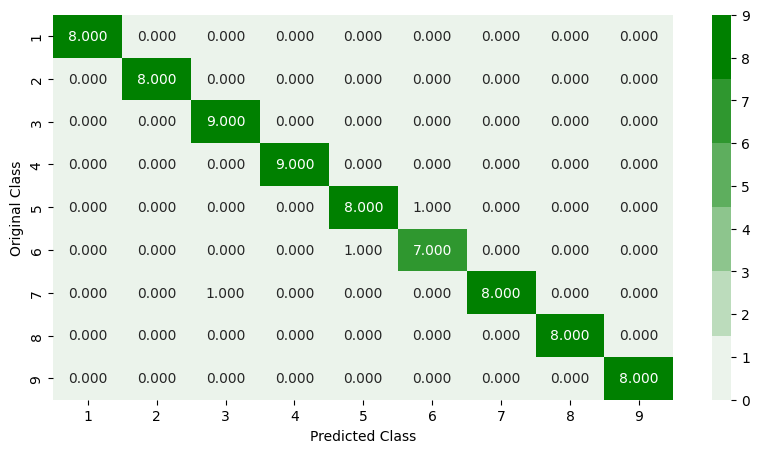

-------------------------------------------------- Precision matrix --------------------------------------------------


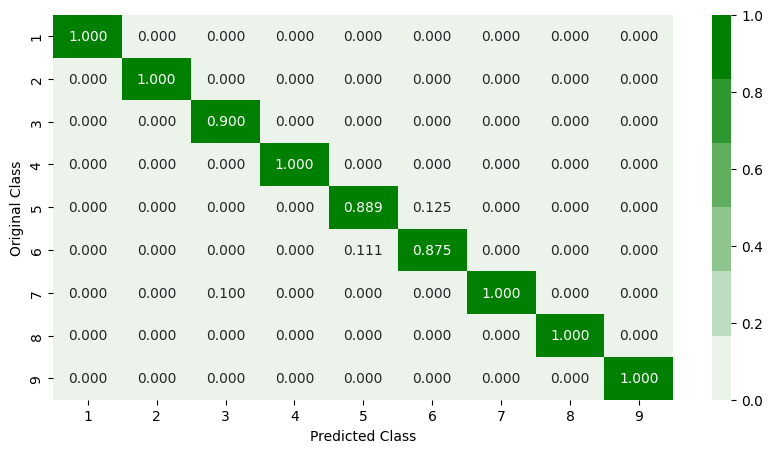

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


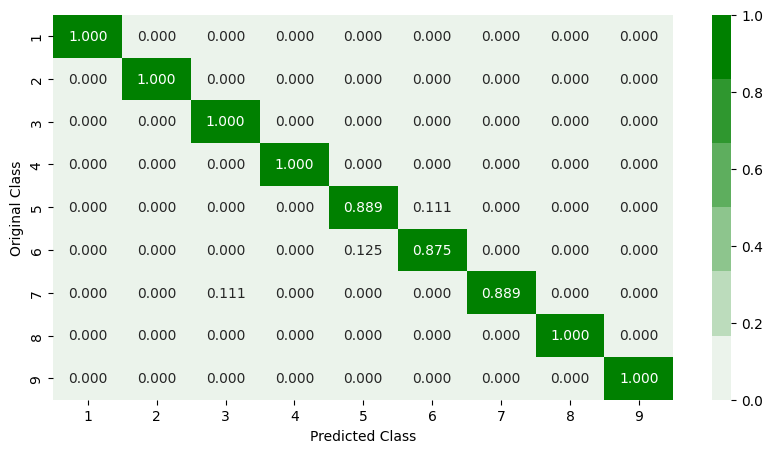

Sum of rows in recall matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [272]:
plot_confusion_matrix(y_test_final_merged,c_cfl.predict(X_test_final_merged))

In [274]:
X_test_final_merged.shape

(76, 1626)

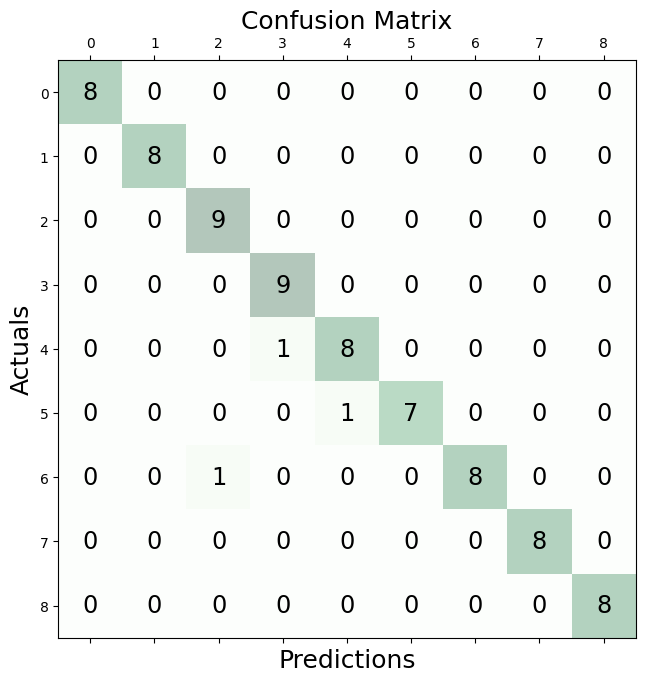

In [273]:
conf_matrix = confusion_matrix(y_true=y_test_final_merged, y_pred=x_cfl.predict(X_test_final_merged))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [275]:
results = x_cfl.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

XGBoostError: No evaluation result, `eval_set` is not used during training.